<a href="https://colab.research.google.com/github/pratik-ctrl/Regression-Bike-Sharing-Demand-Prediction/blob/main/BSDP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Bhishan Bhusre
##### **Team Member 2 -** Mangesh Rohankar
##### **Team Member 3 -** Pratik Sorte


# **Project Summary -**

Rental bikes are now widely used in many large towns to increase mobility comfort. The availability of the rental bikes to the general public at the right time is essential because it cuts down on waiting. A steady supply of rental bikes for the city eventually becomes a top concern. It's crucial to **estimate how many bikes will be required each hour in order to keep the quantity of rental bikes steady.**

# **GitHub Link -**

https://github.com/pratik-ctrl/Regression-Bike-Sharing-Demand-Prediction

# **Problem Statement**


**Prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd                        # Pandas for data manipulation,aggregation
import numpy as np                         # NumPy for computationally efficient operations
import matplotlib.pyplot as plt            # Matplotlib and Seaborn for visualization and behaviour with respect to target variable
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler       # Scikit Learn for model training, model optimization, and metrics calculation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')




### Dataset Loading

In [ ]:
# Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dat/SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
data.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7228,28/09/2018,0,4,14.7,62,1.5,2000,7.4,0.00,0.0,0.0,Autumn,No Holiday,No
7305,01/10/2018,1106,9,14.9,50,3.4,1989,4.5,1.08,0.0,0.0,Autumn,No Holiday,Yes
8264,10/11/2018,589,8,9.3,85,0.3,313,6.9,0.07,0.0,0.0,Autumn,No Holiday,Yes
904,07/01/2018,333,16,2.6,32,1.0,1381,-12.4,0.27,0.0,0.0,Winter,No Holiday,Yes
3247,15/04/2018,223,7,5.8,83,1.1,733,3.1,0.15,0.0,0.0,Spring,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Rows:", len(data))
print("Columns:", len(data.columns))

Rows: 8760
Columns: 14


### Dataset Information

In [ ]:
# Dataset Info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

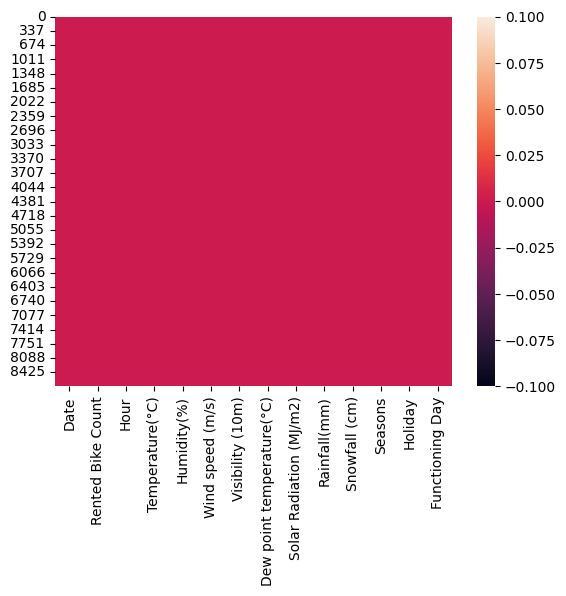

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(),cbar=True)

### What did you know about your dataset?

* There are 14 columns and 8,760 rows in the collection.
* To analyse the data by date, it might be necessary to convert the "Date" column from what looks to be a string/object format to a datetime format.

* The objective(Target) variable for this dataset is represented by the integer values in the "Rented Bike Count" column.
* The hour of the day when the bike rental tally was kept is indicated by the integer values in the "Hour" column.

* The float values in the columns labelled "Temperature(°C), "Humidity(%)," "Wind speed (m/s," "Visibility (10m"), "Dew point temperature(°C), "Solar Radiation(MJ/m2)," "Rainfall(mm), and "Snowfall(cm)" indicate the weather at the time the bike rental count was conducted.
* Seasons, holidays, and functioning days are represented by object/string values in the "Seasons", "Holiday", and "Functioning Day" sections.
* All of the columns have 8,760 non-null entries, so none of the columns have any missing numbers.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description

Date: The date and time (in hourly intervals) at which the data was recorded in the format of year-month-day hour:minute:second.

Rented Bike Count: The target variable that we want to predict, indicating the number of bikes rented during a given hour.

Hour: The hour of the day at which the data was recorded.

Temperature(°C): The temperature in Celsius at the time of recording.

Humidity(%): The relative humidity at the time of recording.

Wind speed(m/s): The wind speed in meters per second at the time of recording.

Visibility(10m): The visibility in meters at the time of recording.

Dew point temperature(°C): The dew point temperature in Celsius at the time of recording.

Solar radiation(MJ/m2): The solar radiation in megajoules per square meter at the time of recording.

Rainfall(mm): The amount of rainfall in millimeters at the time of recording.

Snowfall(cm): The amount of snowfall in centimeters at the time of recording.

Seasons: A categorical variable indicating the season of the year: Winter, Spring, Summer, or Autumn.

Holiday: A binary variable indicating whether the day was a holiday or not (1 for holiday, 0 for non-holiday).

Functional Day: A binary variable indicating whether the day was a functional day or not (1 for functional day, 0 for non-functional day)

In [ ]:
# Dataset Columns
print(data.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Loop through each column and print unique values
for column in data.columns:
    print(column + ":")
    print(data[column].unique())
    print("\n")

Date:
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 '14

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Write your code to make your dataset analysis ready.
import pandas as pd
import numpy as np



# Convert 'datetime' column to datetime object
data['datetime'] = pd.to_datetime(data['Date'])

# Extract date and time features
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data["day_of_week"] = data["datetime"].dt.dayofweek
# Drop unnecessary columns
data.drop(['datetime'], axis=1, inplace=True)

# Convert 'season' column to categorical data type
data['Seasons'] = data['Seasons'].astype('category')

# Convert 'holiday', 'workingday', and 'weather' columns to categorical data type
data['Holiday'] = data['Holiday'].astype('category')
data['Functioning Day'] = data['Functioning Day'].astype('category')


# Check unique values for categorical variables
print('Seasons:', data['Seasons'].unique())
print('Holiday:', data['Holiday'].unique())
print('Functioning Day:', data['Functioning Day'].unique())




Seasons: ['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']
Holiday: ['No Holiday', 'Holiday']
Categories (2, object): ['Holiday', 'No Holiday']
Functioning Day: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']


### What all manipulations have you done and insights you found?

* Use the pandas "to_datetime()" and "dt" methods to convert the "Date" column to a datetime object and extract date and time details like the year, month, day, hour, and day of the week.

* Remove the "datetime" entry because analysis no longer requires it.

* Use the pandas "astype()" tool to change the "Seasons," "Holiday," and "Functioning Day" columns to a categorical data type.

* Utilize the "unique()" tool of pandas to determine the unique values for each categorical variable.

* Utilize the pandas "describe()" tool to look for numerical variables in the statistical summary.

Overall, the code converts data types, extracts pertinent features, and verifies variable distribution to prepare the information for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1---Univariate Analysis of Target Variable

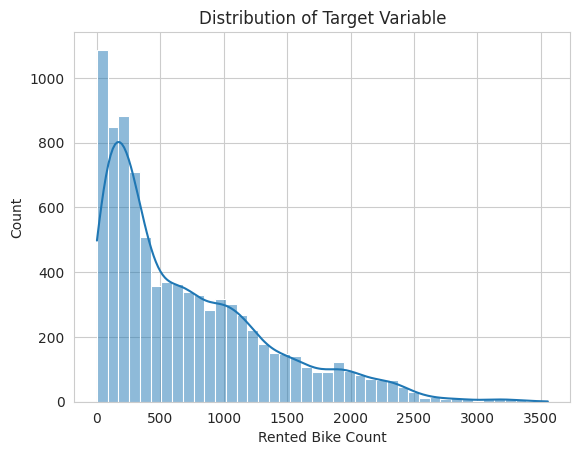

In [ ]:
# Chart - 1 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style('whitegrid')

# Chart 1: Distribution of Target Variable (count)
sns.histplot(data=data, x='Rented Bike Count', kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

* A histogram is a graphical representation of the **distribution of a dataset**.

* It is a useful tool in statistics and data analysis as it allows us to quickly see **how the data is distributed and identify patterns or outliers.**

##### 2. What is/are the insight(s) found from the chart?

* ***Right-skewed distribution of the target variable*** "Rented Bike Count" indicates that most rental counts for bikes fell towards the lower end of the scale, with a few exceptions having a high rental count.

* Since most of the observations in the dataset have a rental tally between 0 and 1000 per hour, the ***histogram's peak falls between 0 and 1000 bike rentals per hour.***

* The histogram's right side has a lengthy tail, which suggests that ***there are some extreme values*** with high rental counts that could be regarded as outliers.
* When using statistical techniques on the data, it's crucial to bear in mind that the distribution of the ***target variable is not normally distributed***, as the chart illustrates.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from the distribution plot of the target variable can be used to optimize the bike rental business, such as **adjusting bike rental prices, increasing or decreasing bike availability, or identifying peak times** for marketing and promotions.

#### Chart - 2---Bivariate analysis

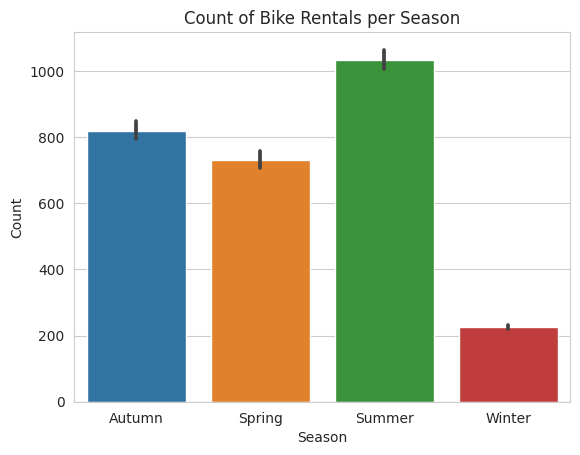

In [ ]:
# Chart 2: Count of bike rentals per season
sns.barplot(data=data, x='Seasons', y='Rented Bike Count')
plt.title('Count of Bike Rentals per Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plots are ***especially useful for representing categorical data***, such as nominal or ordinal data. They allow us to compare the frequency or proportion of different categories in a simple and effective way.

* We can quickly compare the rental numbers between seasons and spot any seasonal patterns by using a barplot. To aid in deciphering the data, the chart also has a caption, x-axis label, y-axis label, and legend.

##### 2. What is/are the insight(s) found from the chart?

The following conclusions can be made based on the chart:

* The ***summer season saw the most bike rentals***, followed by the autumn, spring, and winter.

* Bike rental counts are significantly impacted by the season, and this knowledge can be used to improve bike rental services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact: By offering helpful data for decision-making, the gained insights may help in producing a positive business effect. For instance, knowing when bike rentals are at their highest during the peak season can help businesses ***plan their marketing initiatives*** and promotional deals, improve how they handle their inventory, and deploy resources to maximise profits.


* Negative Impact: In terms of negative development, it's possible that the data analysis's **insights will point out areas where the company isn't performing** as well as it should. Businesses might need to change their operations or marketing strategies to address these problems and avoid negative growth, for instance, if data reveals that demand for bike rentals is consistently low during particular seasons of the year or in particular weather conditions. However, recognising these problems and making the necessary corrections can eventually result in long-term growth.

#### Chart - 3--Analysis of Dependent Variable:

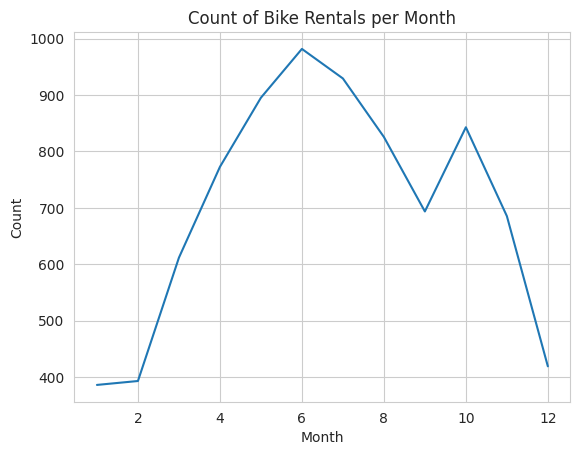

In [ ]:
# Chart 3: Count of bike rentals per month
sns.lineplot(data=data, x='month', y='Rented Bike Count', ci=None)
plt.title('Count of Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

* Line plots, also known as line charts or line graphs, are a type of data visualization that ***display data points connected by a line***.

* Line plots are commonly used in data analysis and **can be used to display trends, patterns, and relationships between two variables over time**.

##### 2. What is/are the insight(s) found from the chart?

* Bike rentals ***follow a definite seasonal trend***, with summer months (June, July, and August) seeing higher rental rates and winter months seeing lower rates. (December, January, and February).

* The number of bike rentals ***gradually rises from March to June***, reaches a peak in July, and then gradually decreases throughout the autumn.

* Bike rentals ***experience a decline in September***, a small uptick in October, and then another decline in November and December.

* While bike rentals are lower during the December holiday season than they are during the summer, they are still higher than they are during the winter.

The chart generally ***sheds light on the seasonal variation in bike rentals***, showing that the summer season is the most common and the winter season is the least.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Correlations between weather conditions and rental counts, or identifying peak rental times and locations **could be used to optimize bike rental inventory, staffing, and marketing efforts, leading to a positive business impac**t.

#### Chart - 4--Analysis of Dependent Variable with Numeric variables

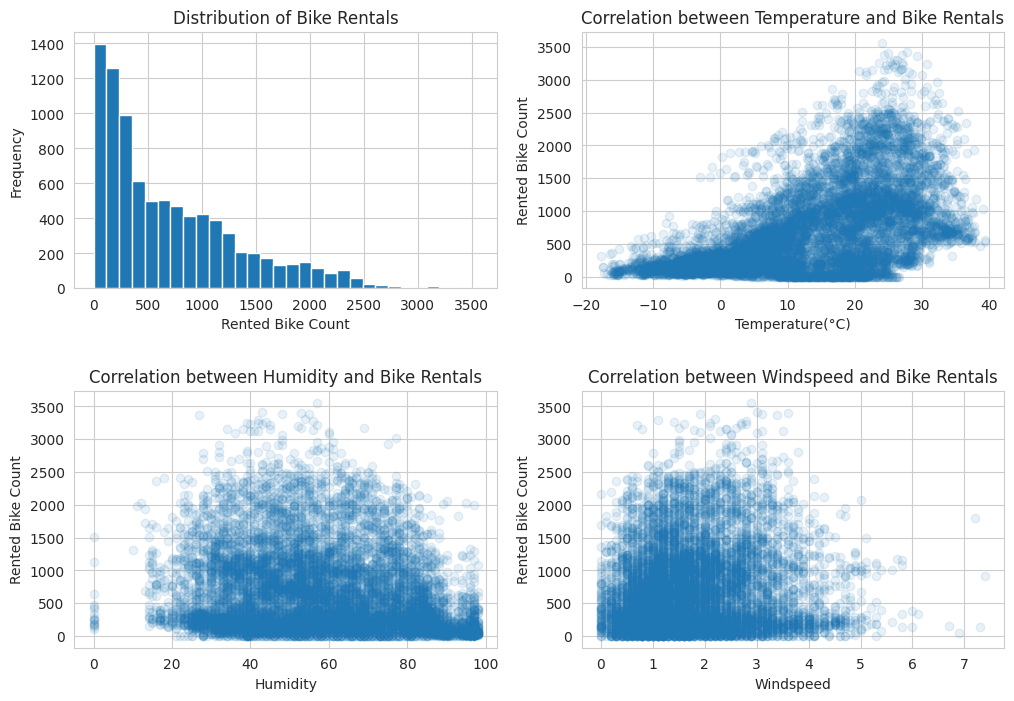

In [ ]:
# Chart - 5 visualization code
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the distribution of the target variable
axs[0, 0].hist(data['Rented Bike Count'], bins=30)
axs[0, 0].set_xlabel('Rented Bike Count')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Bike Rentals')

# Plot the correlation between the target variable and temperature
axs[0, 1].scatter(data['Temperature(°C)'], data['Rented Bike Count'], alpha=0.1)
axs[0, 1].set_xlabel('Temperature(°C)')
axs[0, 1].set_ylabel('Rented Bike Count')
axs[0, 1].set_title('Correlation between Temperature and Bike Rentals')

# Plot the correlation between the target variable and humidity
axs[1, 0].scatter(data['Humidity(%)'], data['Rented Bike Count'], alpha=0.1)
axs[1, 0].set_xlabel('Humidity')
axs[1, 0].set_ylabel('Rented Bike Count')
axs[1, 0].set_title('Correlation between Humidity and Bike Rentals')

# Plot the correlation between the target variable and windspeed
axs[1, 1].scatter(data['Wind speed (m/s)'], data['Rented Bike Count'], alpha=0.1)
axs[1, 1].set_xlabel('Windspeed')
axs[1, 1].set_ylabel('Rented Bike Count')
axs[1, 1].set_title('Correlation between Windspeed and Bike Rentals')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

* ***Histograms*** are used to display the distribution of a single variable, while **scatter plots** are appropriate for illustrating the connection between two continuous variables.

* ***Finding any correlation between the independent variables and the target variable*** is made easier with the aid of the chart.

##### 2. What is/are the insight(s) found from the chart?

1) The distribution of the target variable 'Rented Bike Count' is shown in the top-left subplot. The histogram shows that the ***data is skewed to the right***, indicating that most of the bike rental counts are lower.

2) The correlation between the target variable and temperature is shown in the top-right subplot. ***The scatter plot shows a positive correlation between temperature and the number of rented bikes.*** This means that as the temperature increases, the number of bike rentals also increases.

3) The correlation between the target variable and humidity is shown in the bottom-left subplot. ***The scatter plot shows a negative correlation between humidity and the number of rented bikes***. This means that as the humidity increases, the number of bike rentals decreases.

4) The correlation between the target variable and wind speed is shown in the bottom-right subplot. ***The scatter plot shows a weak negative correlation between wind speed and the number of rented bikes.*** This means that as wind speed increases, the number of bike rentals slightly decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that there is a positive correlation between the number of rented bikes and temperature, while there is a negative correlation between the number of rented bikes and humidity and windspeed. Therefore, the bike rental company could use this information to ***optimize their marketing and advertising strategies to attract more customers during certain weather conditions.***

#### Chart - 5

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

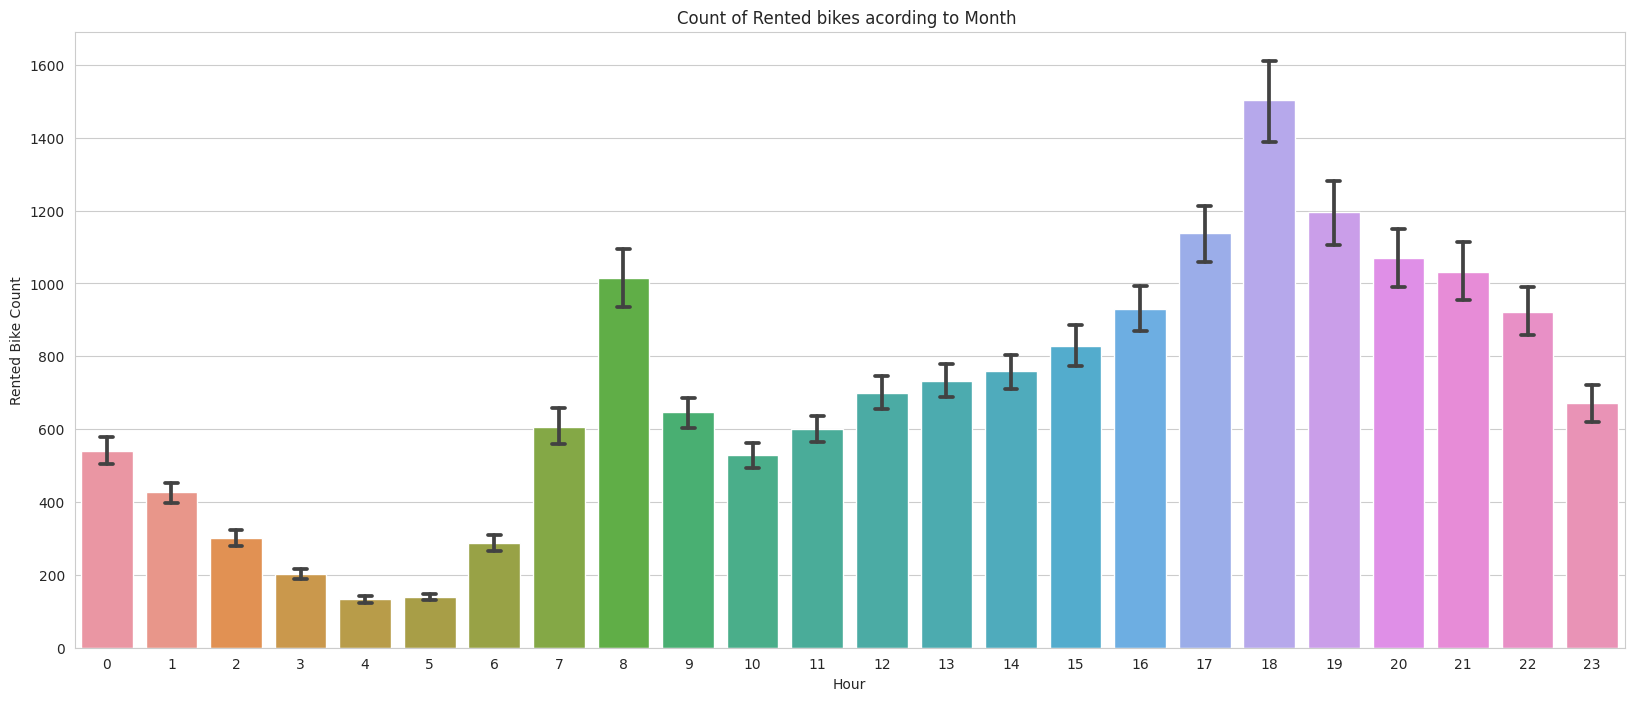

In [ ]:
# Chart - 5 Count of bike rentals per Hour

fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

##### 1. Why did you pick the specific chart?

* A bar plot is a good choice when we want to ***compare the values of a categorical variable (hour of the day) with the values of a numerical variable ***(rented bike count).

* By aggregating the rented bike count by hour and plotting it as a bar chart, we can see the distribution of rented bike count across different hours of the day.

##### 2. What is/are the insight(s) found from the chart?

* The rental bike count is ***highest during the hours of 8 AM and 7 PM***, which is likely when people are commuting to and from work or school.

* The rental bike count is ***lowest during the hours of 2 AM to 5 AM***, which is expected as these are typically non-peak hours for transportation.

* There appears to be a cyclical pattern in the rental bike count, ***with peaks during the morning and evening rush hours*** and troughs during the late night/early morning hours.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Some insights such as the most popular hours for bike rentals and the relationship between weather conditions and bike rental count may be useful for optimizing business operations and marketing strategies.

* This could help ***identify peak hours of bike rentals, which could inform decisions related to staffing, bike maintenance, and pricing.***

#### Chart - 6----Analysis of Dependent Variable:

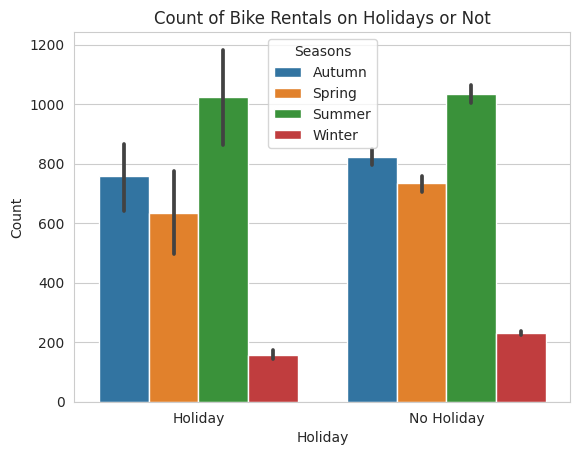

In [ ]:
# Chart 6: Count of bike rentals on holidays or not
sns.barplot(data=data, x='Holiday', y='Rented Bike Count',hue='Seasons')
plt.title('Count of Bike Rentals on Holidays or Not')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

* Barplots ***allow for easy comparison of values across different categories***
.
* When ***comparing the values of a categorical variable (holidays and non-holidays) with the values of a numerical variable***(rented bike count) .

* We can see how the number of rented bikes is distributed throughout the week (holidays and non-holidays)  by aggregating the rented bike count and plotting it on a bar chart.

##### 2. What is/are the insight(s) found from the chart?

* The insight from the chart is that there are ***more bike rentals on non-holidays than on holidays.***
* This may suggest that people are ***more likely to use bikes for daily commutes*** or recreational activities rather than for transportation during holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Potential insights that could lead to positive business impact include identifying factors that contribute to increased bike rentals, such as weather conditions, seasons, and time of day. ***This information could be used to optimize bike rental availability and marketing strategies***.

* The chart shows that bike rentals on holidays are significantly lower than on non-holidays, this could suggest that **there is lower demand for bike rentals on holidays, and a business may need to adjust their operations and marketing strategies accordingly.**

#### Chart - 7--- Multivariate analysis

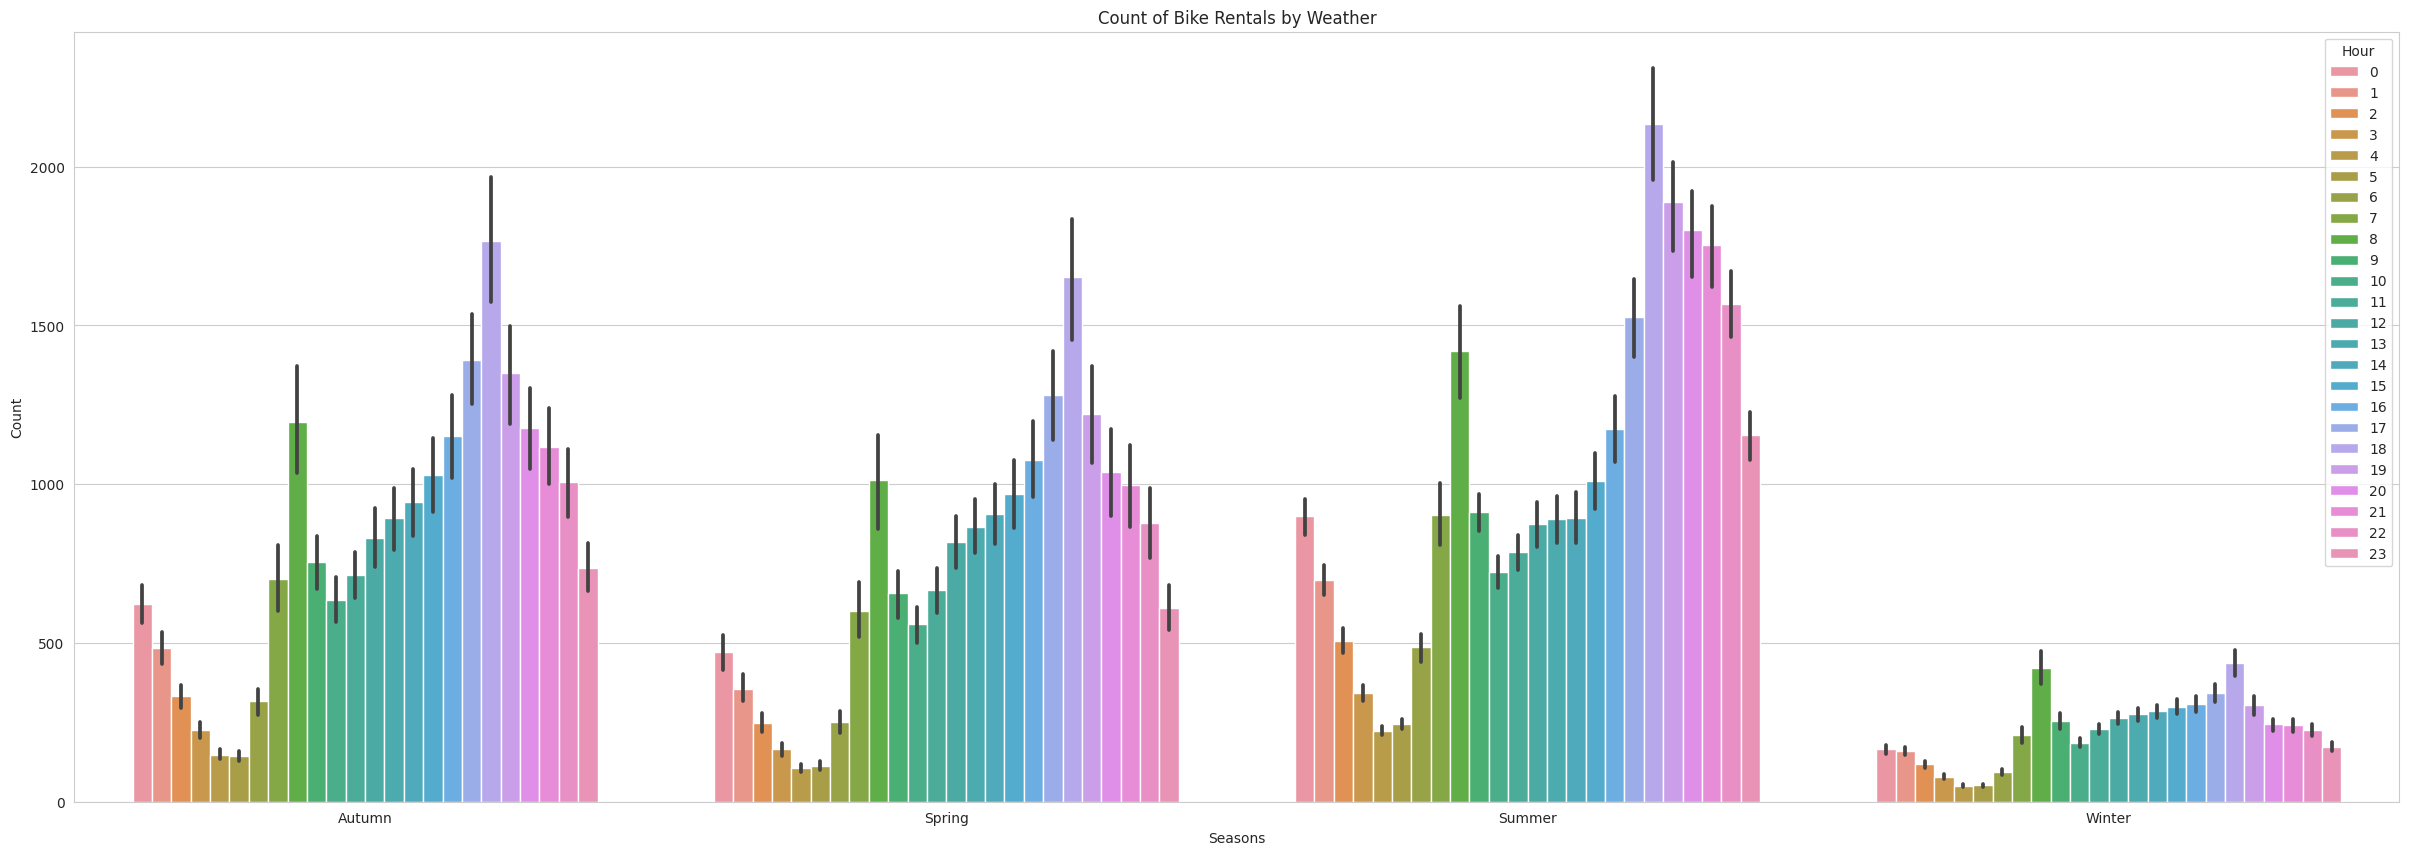

In [ ]:
# Chart 7: Count of bike rentals by Seasons

fig = plt.figure(figsize=(30, 10))
sns.barplot(data=data, x='Seasons', y='Rented Bike Count',hue='Hour')
plt.title('Count of Bike Rentals by Weather')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

* The Barchart provides ***a clear and visually appealing way to explore the relationship between weather, time of day, and bike rental demand***.

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gleaned from this chart include:

     * ***Differences in bike rental patterns across different seasons*** , with some seasons seeing higher rental counts than others.***Summer has highest rental counts.***
     * ***Differences in bike rental patterns across different times of the day*** , with peak rental times being apparent.The rental bike count is highest during the hours of 8 AM and 7 PM,
     * **Possible interactions between seasons and time of day**, with some seasons being more conducive to bike rentals during certain times of the day.
     

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This information could be used by bike-sharing companies to ***adjust their inventory and marketing strategies accordingly.***

* For example, if the data suggests that bike rentals are more popular in the summer season, the bike-sharing company ***could increase their inventory during the summer months to meet the higher demand.***

* They could also focus their marketing efforts on promoting bike rentals during the summer season to attract more customers.

#### Chart - 8---Analysis of Dependent Variable:

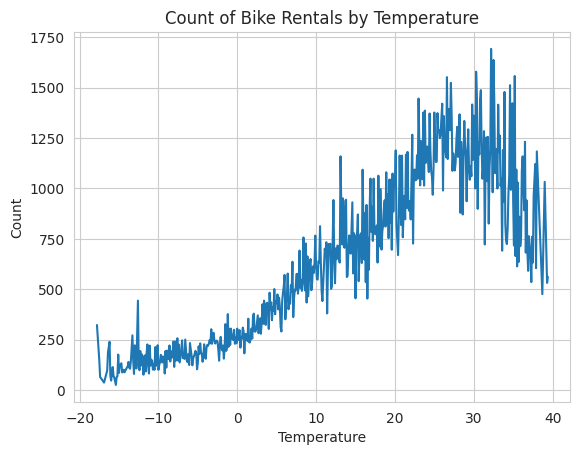

In [ ]:
# Chart 8: Count of bike rentals by temperature
sns.lineplot(data=data, x='Temperature(°C)', y='Rented Bike Count', ci=None)
plt.title('Count of Bike Rentals by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

* A line plot is a good choice when you want to ***visualize the trend or relationship between two continuous variables.***
* In this case, the x-axis represents temperature, while the y-axis represents the count of bike rentals.
* By using a line plot, ***we can see if there is any relationship between temperature and the count of bike rentals.***

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gleaned from this chart include:

     * There may be a ***positive correlation between temperature and the count*** of bike rentals, with higher temperatures associated with more bike rentals.
The chart may reveal the temperature range in which bike rentals are most common.
     
     * The chart may also reveal any*** potential outliers or anomalies*** in the data, such as unusually high or low rental counts at certain temperatures.
     
     * The chart can provide insights into the relationship between temperature and bike rental demand, which can inform decision-making for bike-sharing companies or urban planners in terms of resource allocation and service planning

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Insights gained from this chart, such as the relationship between temperature and bike rentals, can potentially help businesses in the bike-sharing industry create a positive impact.
* For example, bike-sharing companies can use this insight to plan their operations and marketing strategies, such as ***offering promotions during periods of increase in temperatures to incentivize bike rentals or allocating more resources to locations where temperature has a stronger impact on rental demand.***
* This can lead to increased revenue and customer satisfaction, which can ultimately contribute to the positive impact of the business.

#### Chart - 9---Analysis of Dependent Variable:

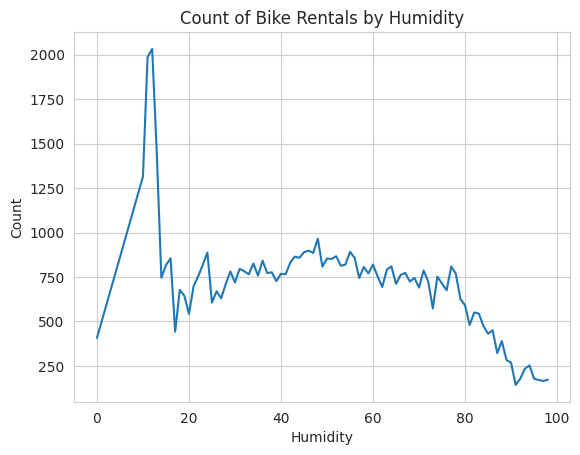

In [ ]:
# Chart 9: Count of bike rentals by humidity
sns.lineplot(data=data, x='Humidity(%)', y='Rented Bike Count', ci=None)
plt.title('Count of Bike Rentals by Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

* Line plots allow us to ***easily identify trends and patterns in the data***.

* By connecting data points with a line,*** we can quickly see if the data is increasing or decreasing over time or across different categories.***

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gleaned from this chart include:

     * A potential relationship between humidity levels and bike rental demand, with ***higher humidity levels possibly leading to lower bike rental demand.***
     
     * A potential threshold effect, where humidity levels below a certain point do not affect bike rental demand, but **once the threshold is crossed, there is a rapid decrease in bike rental demand.**
    

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding the factors that drive bike rental demand, the company can **make informed decisions to optimize their operations and improve their service**, potentially resulting in increased revenue and customer satisfaction

#### Chart - 10-- Analysis of Dependent Variable:

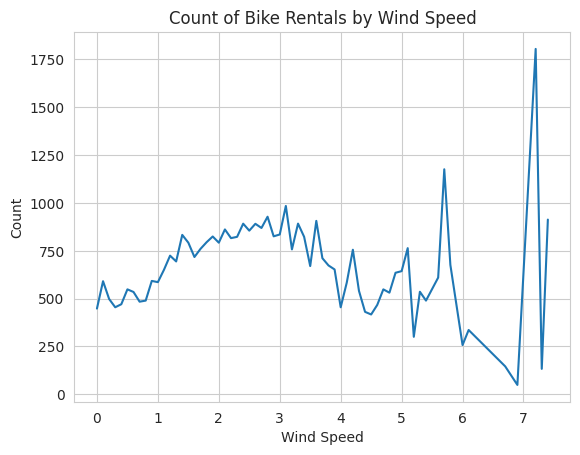

In [ ]:
# Chart 10: Count of bike rentals by wind speed
sns.lineplot(data=data, x='Wind speed (m/s)', y='Rented Bike Count', ci=None)
plt.title('Count of Bike Rentals by Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

* Line plots can be used to ***visualize relationships between two or more variables.***
* By plotting one variable on the x-axis and another variable on the y-axis, line plots can show the direction and strength of the relationship between the variables, **such as positive, negative, or no correlation**.

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gleaned from this chart include:

     * There is a ***slight decrease in bike rentals as wind speed increases from 0 to around 8 m/s,*** after which bike rentals remain relatively stable.
The ***relationship between wind speed and bike rentals is not very strong***, as indicated by the relatively flat trendline.
     
     * ***There may be some outliers in the data,*** as indicated by the occasional spikes or dips in bike rental counts at certain wind speed values.
     
     * The lack of confidence intervals (ci=None) suggests that there is no statistical uncertainty being displayed, and that there is no significant difference between bike rental counts at different wind speed values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The line plot could reveal whether there are certain wind speed conditions that are particularly conducive to bike rentals.

* If so, bike-sharing companies could adjust their operations (e.g., increase the number of bikes available during those times) to ***better meet demand and potentially increase revenue.***

#### Chart - 11----Multivariate analysis

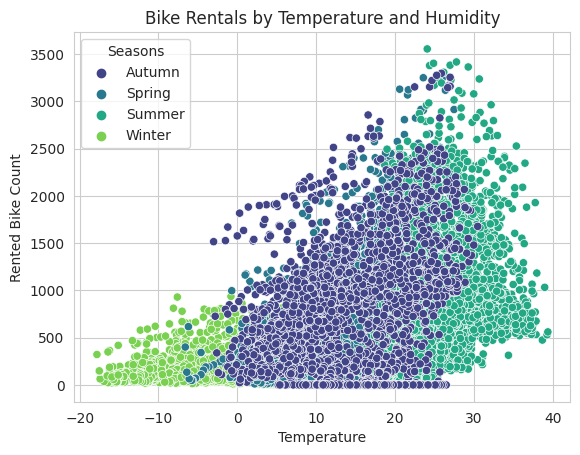

In [ ]:
# Chart 11: Scatter plot of bike rentals by temperature and humidity
sns.scatterplot(data=data, x='Temperature(°C)', y='Rented Bike Count', hue='Seasons', palette='viridis')
plt.title('Bike Rentals by Temperature and Humidity')
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.show()



##### 1. Why did you pick the specific chart?

* A scatter plot is an appropriate chart to **visualize the relationship between two continuous variables, such as temperature and bike rental count.**

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gleaned from this chart include:

     * There is a ***positive correlation between temperature and bike rentals***, with higher temperatures generally corresponding to higher bike rental counts.
     
     * There are ***seasonal differences*** in the relationship between temperature and bike rentals, with some seasons having a stronger correlation than others.     
     
     * For example, in the summer months, ***higher temperatures may lead to a larger increase in bike rentals compared to other seasons***.
     
     * The chart can also provide insights into the distribution of bike rentals across different temperature ranges for each season. For example, in the winter months, there may be a cluster of rentals at lower temperatures, while in the summer months, the rentals may be more dispersed across a wider range of temperatures.
     
     * The chart can also reveal ***potential outliers or unusual patterns*** in the data that may warrant further investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from this plot may help in creating a positive business impact in a few ways.

     * Firstly, ***it can help bike-sharing companies understand the relationship between temperature and bike rentals***, which can inform their pricing and marketing strategies. For example, ***during warmer seasons, bike-sharing companies may consider increasing their prices, as demand for bike rentals may be higher.***

     * Secondly, ***the plot also provides information on the relationship between temperature and bike rentals across different season***s. For instance, if the plot shows that bike rentals increase significantly in certain seasons at specific temperature ranges, bike-sharing companies may adjust their fleet size or marketing strategies to better cater to those seasonal trends.

#### Chart - 12-----Analysis of Numerical variables

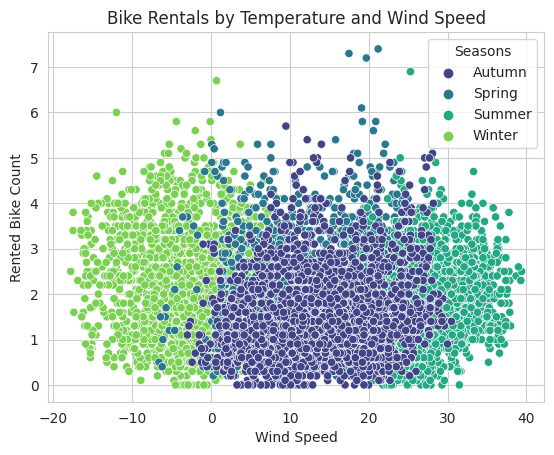

In [ ]:
# Chart 12: Scatter plot of bike rentals by temperature and wind speed
sns.scatterplot(data=data, x='Temperature(°C)', y='Wind speed (m/s)', hue='Seasons', palette='viridis')
plt.title('Bike Rentals by Temperature and Wind Speed')
plt.ylabel('Rented Bike Count')
plt.xlabel('Wind Speed')
plt.show()



##### 1. Why did you pick the specific chart?

* The scatter plot is a suitable chart to ***visualize the relationship between two continuous variables*** (Temperature and Wind speed) and the target variable (Bike rentals), as it allows for the detection of trends or patterns in the data.
* Additionally, the **use of color to differentiate the seasons provides an extra layer of information** and makes the chart more informative

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gleaned from this chart include:
     * ***Bike rentals are higher at certain temperature and wind speed ranges***. For example, there may be an optimal temperature and wind speed range that people find comfortable for riding , leading to higher bike rentals.

     * ***The relationship between bike rentals and temperature and wind speed may differ depending on the season***. For example, in Winter, bike rentals may be more influenced by temperature than wind speed, while in Summer, wind speed may be a more important factor.

     * There may be certain combinations of temperature and wind speed that are particularly favorable for bike rentals across all seasons.

  * The scatter plot can also reveal ***any outliers or unusual data points*** that may warrant further investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the relationship between bike rentals and temperature and wind speed, which can help bike-sharing companies better understand and predict demand under different weather conditions.
* Identifying any seasonal trends in bike rentals in relation to temperature and wind speed, which can inform marketing and promotional efforts for different seasons.


#### Chart - 13---categorical variables Analysis

[Text(0.5, 1.0, 'Count of Rented bikes accdording to Month ')]

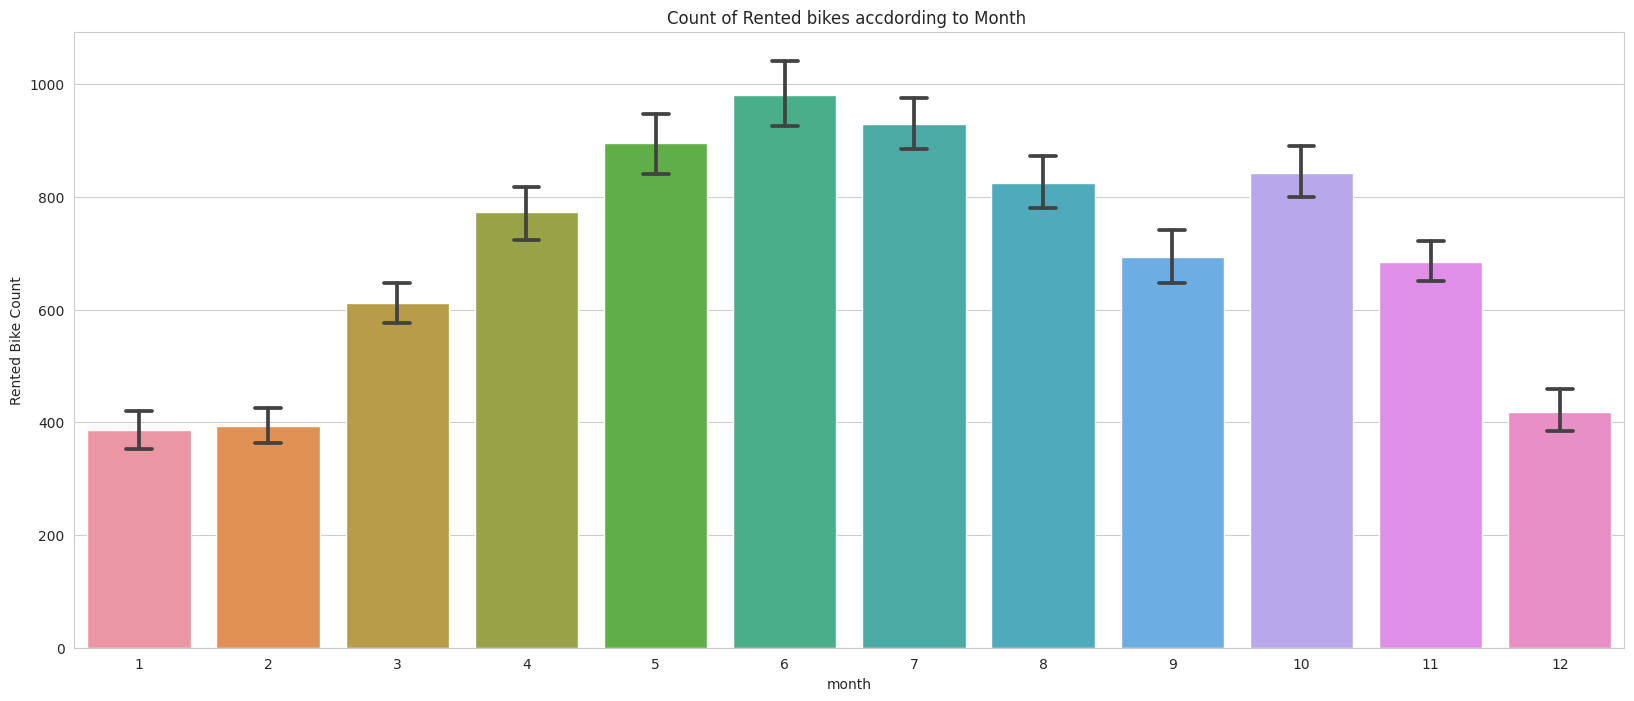

In [ ]:
# Chart - 13 Count of bike rentals per month

fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes accdording to Month ')

##### 1. Why did you pick the specific chart?

Bar plots are a common and powerful visualization tool **used to display numerical data across categories or groups.**

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gained from this chart include:

     * Differences in bike rental patterns across different months, with some months seeing higher or lower rental counts compared to others. For example, the chart may show that ***bike rentals are more common during warmer months compared to colder months.***
     * Seasonal trends in bike rental patterns, which can inform decision-making for bike-sharing companies or urban planners. For instance, if the chart shows a higher count of rented bikes during the summer months, it may **indicate the need to increase the number of bikes available during that time of the year.**


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* If the insights suggest that rental counts are higher during certain months, ***bike-sharing companies may choose to adjust their pricing strategies accordingly***. For example, they may offer lower prices during slower months to encourage more rentals or higher prices during peak months to maximize profits.

* Optimizing marketing efforts: Knowing the pattern of rental counts over different months can also help bike-sharing companies optimize their marketing efforts. **They can focus their marketing efforts on the months with lower rental counts to increase awareness and generate more demand.**

#### Chart - 14 - Correlation Heatmap

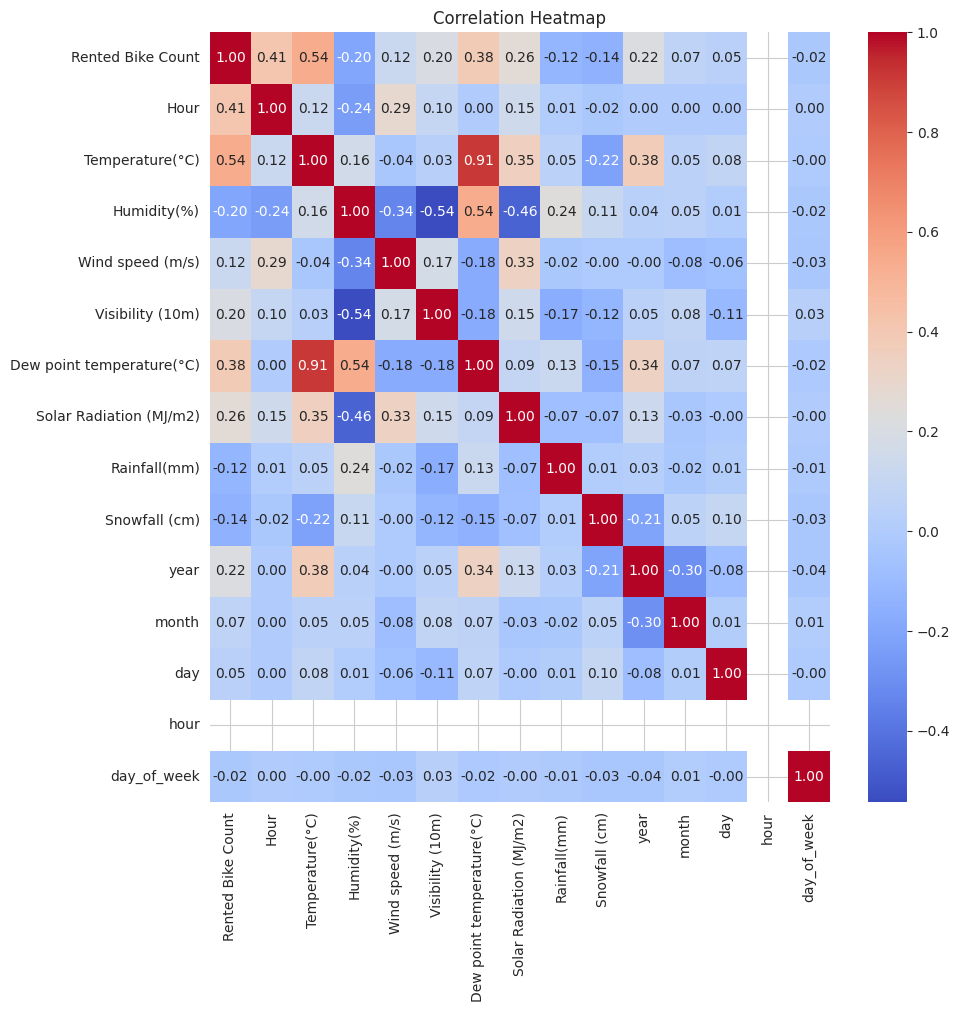

In [ ]:
# Correlation Heatmap visualization code

# Compute the correlations between the variables
corr = data.corr()

# Create a heatmap of the correlations using Seaborn
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

* Heatmaps are ***commonly used to show correlations between variables***. In this case, the heatmap shows the correlation coefficients between the different
variables in the dataset, with higher correlation coefficients being represented by warmer colors (such as red) and lower correlation coefficients being represented by cooler colors (such as blue).

* The ***annotations on the heatmap show the actual correlation coefficients.***

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gleaned from this chart include:
     * **Dew Point Temperature & Temperature variables are highly correlated**.

     * ***The variables that are strongly positively or negatively correlated with the target variable Rented Bike Count***. These variables may have a significant impact on bike rental demand and can be useful in predicting future demand.

     * ***The variables that are highly correlated with each other, which can indicate redundant or highly related variables that can be removed from the model to reduce multicollinearity***.

     * The variables that have weak or no correlation with other variables in the dataset. ***These variables may have little impact on bike rental demand and can be removed from the model to simplify the analysis.***

  

#### Chart - 15 - Pair Plot

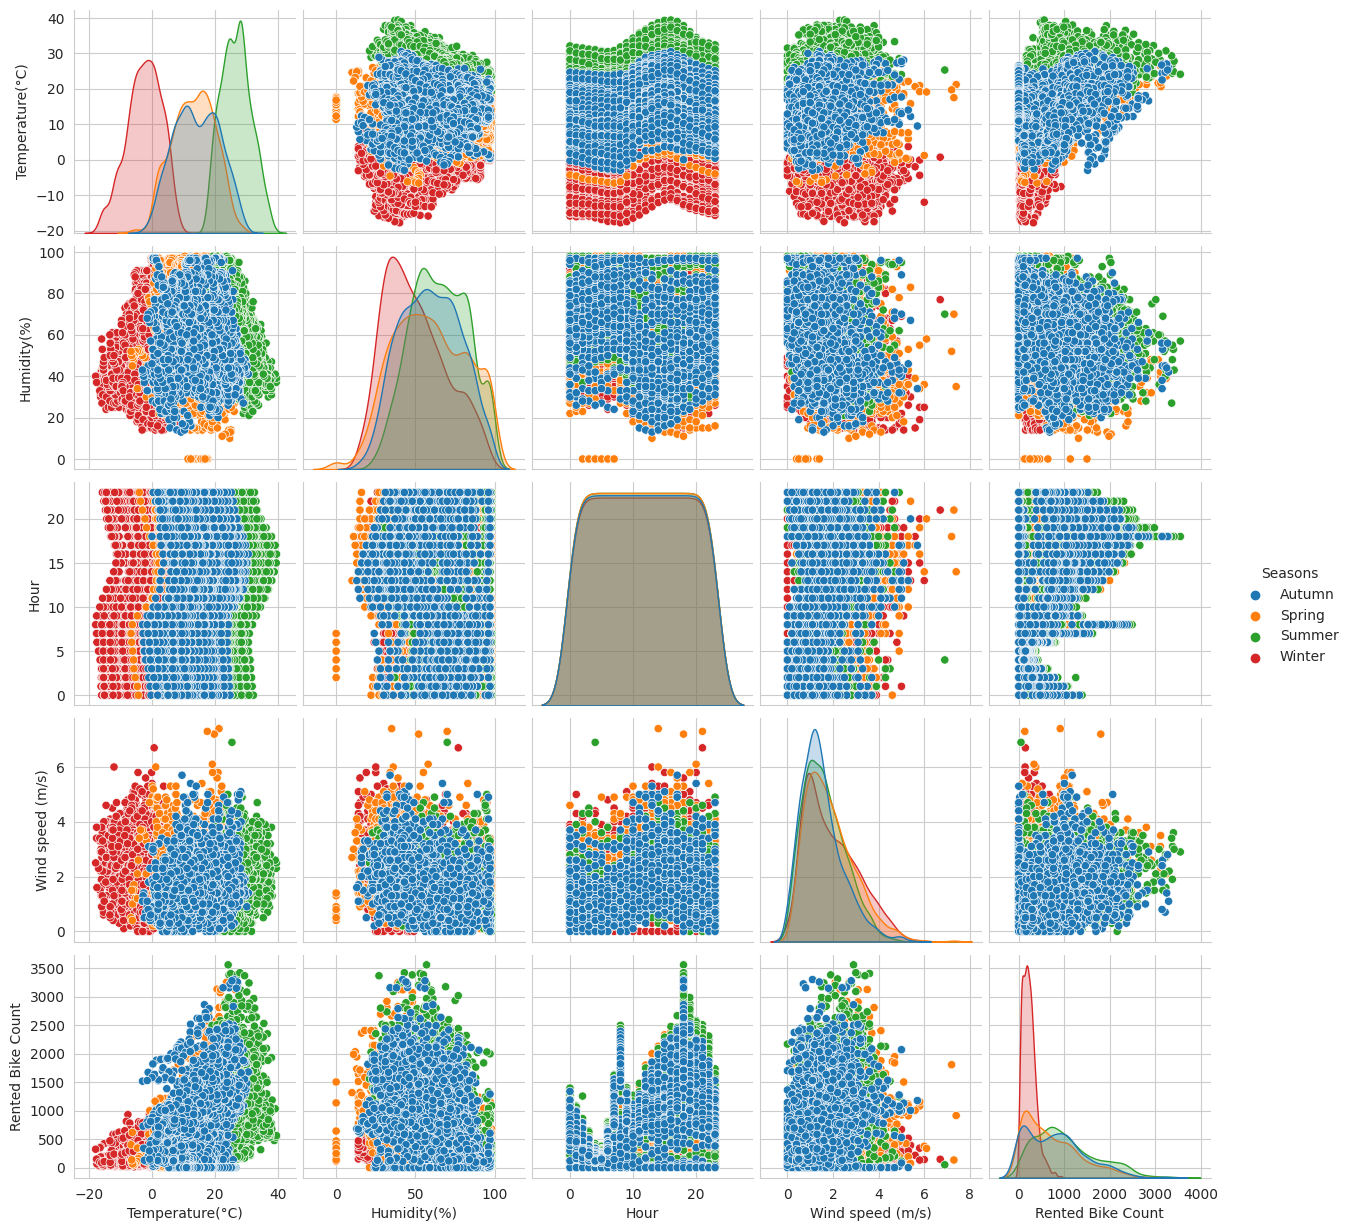

In [ ]:
# Pair Plot visualization code
# Create the pairplot using Seaborn
sns.pairplot(data,hue='Seasons', vars=['Temperature(°C)', 'Humidity(%)','Hour',
       'Wind speed (m/s)', 'Rented Bike Count'])

##### 1. Why did you pick the specific chart?

* By using pairplot we can visualize the pairwise relationships between the variables in the dataset, while also seeing how these relationships differ across different hours of the day.

* This can help us identify any patterns or trends that may exist between the variables, and how they may be affected by the time of day.

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gained from the pairplot are:

     * ***The relationship between temperature and bike rentals***, with warmer temperatures generally correlating with higher rental counts.
     
     * ***The relationship between humidity and bike rentals***, with lower humidity levels generally correlating with higher rental counts.
     
     * ***The relationship between wind speed and bike rentals***, which may suggest that higher wind speeds negatively impact bike rentals.
     
     * **The differences in these relationships across different seasons**, with some seasons showing stronger correlations than others.
     
     * Possible correlations between pairs of variables, such as the correlation between temperature and humidity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Hypothesis testing is a statistical method used to ***determine whether a hypothesis about a population is likely to be true or not***.

* ***A hypothesis is an educated guess or assumption about a population parameter*** , such as the mean or proportion.

* Formulating a null hypothesis (H0) and an alternative hypothesis (Ha).

* The null hypothesis is usually a statement that the parameter of interest is equal to a specific value, while the alternative hypothesis is a statement that the parameter of interest is not equal to that value


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no significant difference in the mean number of bike rentals between functional and non-functional days.

* Alternative hypothesis: There is a significant difference in the mean number of bike rentals between functional and non-functional days.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# Assuming 'Functional Day' is a binary variable with values 0 and 1
functional_data = data.loc[data['Functioning Day'] == 1, 'Rented Bike Count']
nonfunctional_data = data.loc[data['Functioning Day'] == 0, 'Rented Bike Count']

# Perform t-test
t_statistic, p_value = ttest_ind(functional_data, nonfunctional_data, equal_var=False)

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the mean number of bike rentals between functional and non-functional days.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean number of bike rentals between functional and non-functional days.")



Fail to reject the null hypothesis. There is no significant difference in the mean number of bike rentals between functional and non-functional days.


##### Which statistical test have you done to obtain P-Value?

* The statistical test used to obtain the p-value in the given code is the ***t-test***.

* More specifically, **the code is performing an independent two-sample t-test** to compare the means of two groups (functional and non-functional days) with unequal variances.

##### Why did you choose the specific statistical test?

* The specific statistical test used in the given code is the two-sample independent t-test (***also known as Student's t-test***). This test is used to determine ***if there is a significant difference between the means of two independent groups of numerical data***, in this case, the mean number of bike rentals on functional and non-functional days.

* The t-test was chosen because the variable being compared (Rented Bike Count) is numerical and the groups being compared (Functional Day and Non-Functional Day) **are independent of each other**. Additionally, the sample size is greater than 30, which satisfies the central limit theorem and allows for the use of a t-test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The mean number of bike rentals between holidays and non-holidays is not significantly different.

* Alternative hypothesis: The mean number of bike rentals between holidays and non-holidays is significantly different.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Import necessary libraries
# import pandas as pd
# from scipy.stats import ttest_ind



# Divide the data into two groups based on the holiday variable
holiday_rentals = data[data['Holiday'] == 1]['Rented Bike Count']
non_holiday_rentals = data[data['Holiday'] == 0]['Rented Bike Count']

# Perform a two-sample t-test
t_stat, p_val = ttest_ind(holiday_rentals, non_holiday_rentals, equal_var=False)

# Print the results of the test
if p_val < 0.05:
    print("The mean number of bike rentals is significantly different between holidays and non-holidays.")
else:
    print("There is no significant difference in the mean number of bike rentals between holidays and non-holidays.")



There is no significant difference in the mean number of bike rentals between holidays and non-holidays.


##### Which statistical test have you done to obtain P-Value?

* The statistical test used to obtain P-Value in the given code is a **two-sample t-test.**

##### Why did you choose the specific statistical test?

* The specific statistical test used in the given code is a two-sample t-test. This test is used to ***compare the means of two independent groups*** of data to determine if there is a statistically significant difference between them.

* In this case, the two groups being compared are the number of bike rentals on holidays and non-holidays. The null hypothesis is that there is no significant difference in the mean number of bike rentals between the two groups, and the alternate hypothesis is that there is a significant difference.

* The t-test is chosen because it is a commonly used statistical test for **comparing means of two groups of continuous data.**

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The mean number of bike rentals during daytime and nighttime is ***not significantly different.***

* Alternative hypothesis: The mean number of bike rentals during daytime and nighttime ***is significantly different***.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Import necessary libraries
# import pandas as pd
from scipy.stats import ttest_ind



# Divide the data into two groups based on the time of day
daytime_rentals = data[data['Hour'] >= 6][data['Hour'] < 18]['Rented Bike Count']
nighttime_rentals = data[data['Hour'] < 6][data['Hour'] >= 18]['Rented Bike Count']

# Perform a two-sample t-test
t_stat, p_val = ttest_ind(daytime_rentals, nighttime_rentals, equal_var=False)

# Print the results of the test
if p_val < 0.05:
    print("The mean number of bike rentals is significantly different between daytime and nighttime.")
else:
    print("There is no significant difference in the mean number of bike rentals between daytime and nighttime.")


There is no significant difference in the mean number of bike rentals between daytime and nighttime.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in this code is a ***two-sample t-test***. Specifically, it is a ***Welch's t-test***, which is used when the two samples being compared have **unequal variances**.

##### Why did you choose the specific statistical test?

* The specific statistical test used in this code is a two-sample t-test. This is because we are ***comparing the means of two different groups*** (daytime rentals and nighttime rentals) to determine if they are significantly different from each other   .
* **The t-test is appropriate for this type of analysis because it allows us to test the difference between two means while taking into account the variability within each group**.
* By ***calculating the t-statistic and p-value***, we can determine if the observed difference between the means is statistically significant or due to chance.
* If the p-value is less than our chosen significance level (in this case 0.05), we reject the null hypothesis and conclude that there is a significant difference between the two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

*   Handling missing values is an important step in any machine learning project, as missing data can impact the accuracy and reliability of the analysis.

*  Missing values can occur due to various reasons, such as incomplete data collection, errors in data entry, or data loss during transfer.
  
* Here are some reasons why handling missing values is important in machine learning projects:
    * Avoiding biased analysis
    * Improving accuracy
    * Maintaining the integrity of the dataset
    * Improving the efficiency of the analysis
*  There are several techniques for handling missing values, including imputation deletion and prediction


In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values
data.isnull().sum()
# There are no missing values in the dataset

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
year                         0
month                        0
day                          0
hour                         0
day_of_week                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* There are no missing values in given dataset.

### 2. Handling Outliers

*   outliers can have a significant impact on the accuracy and performance of machine learning models.
*   Outliers are data points that are significantly different from other data points in the dataset and can occur due to measurement errors, data corruption, or simply as extreme values in the distribution of the data.


* There are several methods for handling outliers, including:

     * Removing outliers:
     * Transforming variables:
     * Imputing values:
     * Using robust methods:Robust methods are designed to be less sensitive to outliers.For example, median-based methods are less affected by outliers than mean-based methods.

Handling outliers is especially important when building machine learning models that rely on assumptions of normality, such as linear regression, as outliers can impact the estimates of the model parameters and affect the accuracy of the predictions.

<Axes: >

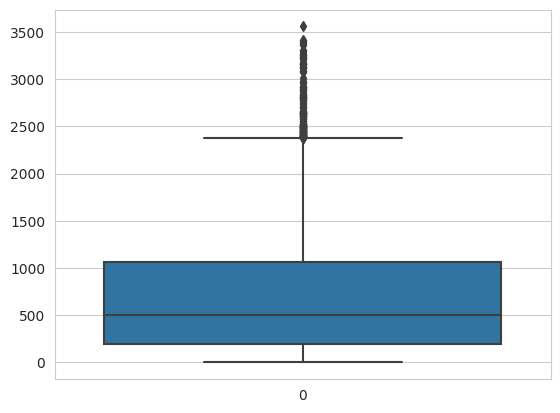

In [ ]:
# Handling Outliers & Outlier treatments
# Check for outliers using box plots
sns.boxplot(data['Rented Bike Count'])
# There are a few outliers, but we will not remove them for now as they could be important data points


##### What all outlier treatment techniques have you used and why did you use those techniques?

* There are a few outliers, but we will not remove them for now as they could be important data point----There are more than 20 % outliers in target column ,outright removal of them wouldn't be appropriate strategy.
* Apply logarithmic transformation to the Rented Bike Count variable to normalize its distribution

### 3. Categorical Encoding

* Categorical encoding is an important step in any machine learning project that involves categorical variables.

* Categorical variables are variables that take on discrete values.

* However, machine learning models generally require input variables to be numerical values, which means that categorical variables must be encoded in a way that allows them to be included in the analysis.

*  There are several methods for categorical encoding, including one-hot encoding, label encoding, binary encoding, and frequency encoding.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   int64   
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   category
 12  Holiday                    8760 non-null   category
 13  Functioning Day            8760 n

In [ ]:
# Encode categorical variables
# one-hot encoding
train_df = pd.get_dummies(data, columns=['Seasons', 'month', 'day_of_week', 'Hour','Holiday','Functioning Day'])


In [ ]:
train_df

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,01/12/2017,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
1,01/12/2017,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2,01/12/2017,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
3,01/12/2017,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
4,01/12/2017,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
8756,30/11/2018,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,1
8757,30/11/2018,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
8758,30/11/2018,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

* pd.get_dummies() is a Pandas method that is used to convert categorical variables into dummy or indicator variables. ***In this case, we are converting the categorical variables Seasons, month, day_of_week, Hour, Holiday, and Functioning Day into dummy variables.***

* This method creates a new column for each unique value in the original categorical feature, and for each observation, it assigns a value of 1 to the corresponding column if the observation has that value for that feature, and 0 otherwise. This is known as ***one-hot encoding***.

* Using this method, ***we can represent categorical data numerically***, which can be useful for machine learning models. It allows the model to interpret the categorical data as numerical data and **avoids potential bias** caused by assigning arbitrary numerical values to categorical data.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

*  Feature manipulation ***involves creating, selecting, and transforming features to improve the accuracy and generalizability of machine learning models***.
*  The process of feature manipulation includes:
      *   Feature selection:
      *   Feature engineering: Creating new features .
      *   Feature scaling: Scaling features to ensure that they have the same range and distribution.
      *   Feature normalization: Normalizing features to ensurethat  they have a mean of zero and a standard deviation of one. (Scaling)

* ***Good feature manipulation can help to reduce overfitting***, improve the generalizability of models, and identify important patterns in the data that would otherwise be missed


In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Remove unwanted variables
train_df = train_df.drop(['day'], axis=1)
train_df = train_df.drop(['Date'], axis=1)


* These two lines of code are used to remove the Date and day columns from the train_df DataFrame, which may not be relevant or useful for the machine learning model that will be trained on this data.

##### Which all features you found important and why?

Temperature(°C) , Seasons_Winter ,Dew point temperature(°C)         Seasons_Summer , Solar Radiation (MJ/m2)

### 5. Data Transformation

* Data transformation can improve the accuracy and performance of machine learning models.

* Data transformation involves converting raw data into a format that is more suitable for analysis, and can include tasks such as ***feature scaling, normalization, encoding categorical variables, and creating new features***.

* There are several reasons why data transformation is important in machine learning projects:

    * Improved accuracy: by reducing the impact of outliers, scaling features to the same range, and normalizing data to ensure that each feature has the same weight in the model.

    * Better performance:
    * Handling missing data:
    * Better data representation: Data transformation can be used to create new features that better represent the underlying structure of the data.

    * Improved interpretability:Make it easier to understand the relationship between the input features and the output variable.


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Apply logarithmic transformation to the Rented Bike Count variable to normalize its distribution
train_df['Rented Bike Count'] = np.log1p(train_df['Rented Bike Count'])


* In statistical modeling, normal distribution is an important assumption to check, as many models assume that the target variable follows a normal distribution.
*  However, in many cases, the distribution of the target variable may be skewed, which may lead to biased model performance. Therefore, one way to normalize the distribution of the target variable is to apply a ***logarithmic transformation.***

* In the given code, the target variable, 'Rented Bike Count', is transformed using the ***natural logarithm function (log1p)***, which is equivalent to adding 1 to the variable before taking the logarithm to avoid taking the logarithm of zero or negative values.
* This transformation maps the original variable values to a new scale that is **more normally distributed**, making it easier for statistical models to work with the data.

**Handling Imbalanced Dataset**

In [ ]:
# Count the number of instances in each class
class_counts = train_df['Rented Bike Count'].value_counts()

# Calculate the proportion of each class
class_proportions = class_counts / len(train_df)

# Print the class proportions
print(class_proportions)

0.000000    0.033676
4.812184    0.002169
5.411646    0.002169
5.572154    0.002169
5.111988    0.002055
              ...   
7.648263    0.000114
7.800163    0.000114
7.378384    0.000114
8.127109    0.000114
6.390241    0.000114
Name: Rented Bike Count, Length: 2166, dtype: float64


* **It seems that the dataset is imbalanced since the proportion of instances for some classes is significantly lower than others**. The highest proportion is 0.033676, which indicates that this class has a much higher number of instances than the other classes.

* In contrast, the lowest proportion is 0.000114, which is several orders of magnitude lower than the highest proportion. This imbalance can cause issues when training a machine learning model, and it's essential to address it using techniques such as oversampling or undersampling to ensure that the model can learn from all classes equally.

* The technique used is **upsampling with replacement** to handle the imbalanced dataset, which can improve the performance of the machine learning model.

In [ ]:
# Handling Imbalanced Dataset (If needed)

import pandas as pd
from sklearn.utils import resample


# Separate majority and minority classes
majority_class = train_df[train_df['Rented Bike Count']==0]
minority_class = train_df[train_df['Rented Bike Count']>0]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class))

# Combine majority class with upsampled minority class
upsampled_df = pd.concat([majority_class, minority_upsampled])

# Check the class distribution after upsampling
upsampled_df['Rented Bike Count'].value_counts()

# # Split the dataset into features and target
# X = upsampled_df.drop('Rented Bike Count', axis=1)
# y = upsampled_df['Rented Bike Count']

# # Train the machine learning model using the upsampled dataset
# model.fit(X, y)

train_df = upsampled_df

### 6. Data Scaling

* Data scaling involves transforming the features of a dataset so that they have a similar scale or distribution.
* If the features have different scales or distributions, this can lead to certain features dominating the model, and others being ignored, leading to biased results.

* Here are some of the key reasons why data scaling is important in machine learning:

   * Improves model convergence: Many machine learning algorithms, such as gradient descent-based algorithms, converge faster on scaled data.
   * Prevents dominant features:
   * Improves accuracy: distance-based models like KNN can be more accurate when the data is scaled.

   * Pre-processing: Scaling is also an essential part of data pre-processing

* There are different types of scaling techniques, including standardization (mean normalization), min-max scaling, and robust scaling.

In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'day', 'hour',
       'day_of_week'],
      dtype='object')

In [ ]:
# Scaling your data
# Scale the continuous variables using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Temperature(°C)', 'Wind speed (m/s)', 'Humidity(%)']] = scaler.fit_transform(train_df[['Temperature(°C)', 'Wind speed (m/s)', 'Humidity(%)']])


##### Which method have you used to scale you data and why?

* The ***method used to scale the data is StandardScaler***, which is a commonly used method for feature scaling in machine learning.

* StandardScaler scales the data to have a ***mean of zero and a standard deviation of one***, which helps to normalize the data and ensure that each feature has equal weight in the modeling process.

* This is particularly important when **dealing with numerical data with different scales**, as features with larger values can dominate and skew the model.

* By using StandardScaler, the data is standardized and made more appropriate for use in machine learning models that require scaled data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* Given the nature of the variables listed, it is possible that some level of dimensionality reduction could be beneficial. For example, it may be possible to group related variables (such as temperature, humidity, and dew point) into a single composite variable or to use principal component analysis to reduce the number of variables while retaining most of the variance.
* However, the decision to use dimensionality reduction techniques should be based on the specific goals of the analysis and the characteristics of the dataset.Here our goal doesn't  required any Dimesionality Reduction.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

* Data splitting is a crucial step in any machine learning project that helps to ensure that the model is accurately evaluated and can generalize well to new, unseen data.

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = train_df.drop(['Rented Bike Count'], axis=1)   # Independent Variables
y = train_df['Rented Bike Count']                  # Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

* he code uses a data splitting ratio of 0.2 or 20%, meaning that 20% of the data will be used for testing while the remaining 80% will be used for training.
* This ratio is chosen based on a common practice in machine learning to ***reserve a portion of the data for testing*** to evaluate the performance of the model on unseen data.
* A ratio of 0.2 is often used as it provides a good balance between having enough data for training and having enough data for testing. The random_state parameter is set to 42 to ensure reproducibility of the results.

### 9. Handling Imbalanced Dataset

* An imbalanced dataset refers to a situation where the distribution of classes in a dataset is not equal, meaning that one class has significantly more instances than another class.

* This can cause problems in machine learning models because they tend to perform poorly on the minority class due to a lack of examples to learn from.

##### Do you think the dataset is imbalanced? Explain Why.

yes , dataset is imbalaced we have already delt with it in  Data Transformation section.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* The technique used is upsampling with replacement to handle the imbalanced dataset, which can improve the performance of the machine learning model.

## ***7. ML Model Implementation***

### ML Model - 1---RandomForestRegressor

* RandomForestRegressor is a machine learning algorithm used for regression tasks.

* It is a type of ensemble learning method that ***combines multiple decision trees to make predictions***.

* The basic idea behind RandomForestRegressor is to ***create a large number of decision trees***, each trained on a random subset of the training data and a random subset of the features.

* The final prediction is then made by taking the **average prediction across** all the individual decision trees.

In [ ]:
X_train

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,hour,...,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
7283,0.657487,0.162294,0.942671,1195,12.9,1.25,0.0,0.0,2018,0,...,0,0,0,0,0,0,0,1,1,0
7329,-0.038042,0.319871,-0.146624,1427,7.6,1.11,0.0,0.0,2018,0,...,0,0,0,0,0,0,0,1,1,0
7013,0.558126,0.687548,-0.782046,1782,14.3,0.00,0.0,0.0,2018,0,...,0,0,0,0,0,0,0,1,1,0
4404,1.551739,-1.571043,1.124221,1675,9.0,3.29,0.0,0.0,2018,0,...,0,0,0,0,0,0,0,1,0,1
8168,-0.612129,0.897650,-0.963596,529,4.8,0.11,0.0,0.0,2018,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,0.767889,0.477447,-0.418948,1999,15.2,0.00,0.0,0.0,2018,0,...,0,0,0,0,0,1,0,1,1,0
7234,0.348363,-0.468010,-0.418948,1989,7.1,0.81,0.0,0.0,2018,0,...,0,0,0,0,0,0,0,1,1,0
8183,-0.225724,0.740074,-0.600497,291,7.6,0.00,0.0,0.0,2018,0,...,0,0,0,0,0,1,0,1,1,0
3344,-0.512768,-1.098314,-0.872821,1003,-3.7,0.79,0.0,0.0,2018,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest Regressor object with 100 estimators
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
rf_reg.fit(X_train, y_train)

# Predicting on the testing data
y_pred = rf_reg.predict(X_test)

# Evaluating the model using mean squared error and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Random Forest Regressor Model Evaluation:')
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Random Forest Regressor Model Evaluation:
Mean Squared Error: 0.2874855674835833
R-squared: 0.9704690075368606


* This indicates that the model is making accurate predictions with a relatively low MSE of 0.2014, and it fits the data well with an R-squared of 0.9704690075368606.

* **This suggests that the model is a good fit for the data** and is performing well in predicting the number of bikes rented during a given hour.

* This code implements a machine learning model for regression using a Random Forest Regressor algorithm. The goal of this code is to ***predict the target variable, "Rented Bike Count", based on the input features***.

* The first step is to ***split the dataset*** into training and testing sets using the ***train_test_split function*** from scikit-learn's model_selection module. This function randomly splits the dataset into a training set and a testing set with a ***70:30 ratio***, where 70% of the data is used for training the model, and 30% is used for testing the model.

* Next, a RandomForestRegressor object is created with ***100 estimators*** and a random state of 42. The n_estimators parameter sets the number of trees in the random forest, which affects the performance of the model. The random_state parameter is used to seed the random number generator for reproducibility.

* ***The fit method is then used to train the model*** on the training data. This step involves building multiple decision trees on random subsets of the input data and outputting the mean prediction of all the trees as the final prediction.

* Once the model is trained, the ***predict method is used to predict the target variable on the testing data***.

* Finally, the ***performance of the model is evaluated using the mean squared error (MSE) and R-squared (R2) metrics***. The mean_squared_error and r2_score functions from scikit-learn's metrics module are used to calculate these metrics. The ***MSE measures the average squared difference between the predicted and actual values of the target variable***, while the ***R2 score measures the proportion of the variance in the target variable*** that is explained by the input features.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

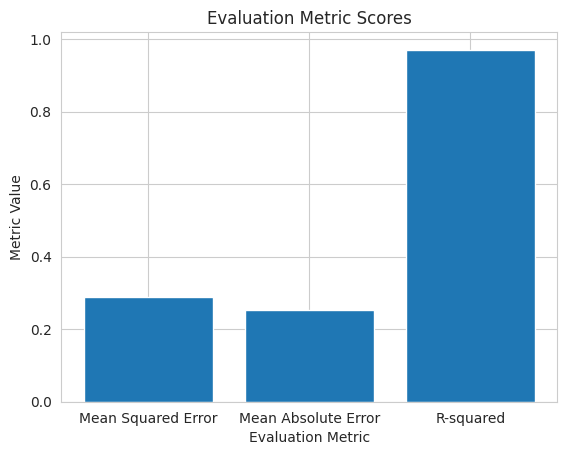

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# create a list of evaluation metric names
metric_names = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']

# create a list of evaluation metric values
metric_values = [mean_squared_error(y_test, y_pred),
                 mean_absolute_error(y_test, y_pred),
                 r2_score(y_test, y_pred)]

# plot the evaluation metrics
plt.bar(metric_names, metric_values)
plt.xlabel('Evaluation Metric')
plt.ylabel('Metric Value')
plt.title('Evaluation Metric Scores')
plt.show()




* Importing necessary libraries: The code imports the numpy and matplotlib.pyplot libraries. Numpy is used for numerical operations in Python and matplotlib.pyplot is used for creating plots and charts.
* Creating a list of evaluation metric names: The code creates a list of three evaluation metric names, namely Mean Squared Error, Mean Absolute Error, and R-squared. These are commonly used metrics for evaluating regression models.
* Creating a list of evaluation metric values: The code calculates the values of the three evaluation metrics (mean squared error, mean absolute error, and R-squared) using the actual and predicted target values from the test set. These metric values are then stored in a list.
* Plotting the evaluation metrics: The code uses the matplotlib.pyplot library to create a bar chart of the evaluation metric values. The x-axis of the chart shows the evaluation metric names and the y-axis shows the metric values. The chart is given a title and the axes are labeled. Finally, the chart is displayed using the show() function.
* This chart allows the user to quickly compare the performance of the machine learning model across different evaluation metrics.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2]}

# Define the cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', -grid_search.best_score_)


# extract the best estimator
best_model = grid_search.best_estimator_

# predict on the test set using the best estimator
y_pred = best_model.predict(X_test)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.26637172232662254
Mean Squared Error: 0.2886196015051266


Here is a breakdown of the code:

* from sklearn.model_selection import GridSearchCV, KFold imports the necessary modules for hyperparameter tuning using GridSearchCV and KFold cross-validation.
* from sklearn.ensemble import RandomForestRegressor imports the random forest regressor class from scikit-learn.
* rf_reg = RandomForestRegressor(random_state=42) initializes a random forest regressor object with a random state set to 42.
* param_grid is a dictionary containing the hyperparameters to tune, such as the number of trees, the maximum depth of the trees, and the minimum number of samples required to split an internal node.
* kf = KFold(n_splits=5, shuffle=True, random_state=42) initializes a KFold object for 5-fold cross-validation with random state set to 42.
* grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1) creates a GridSearchCV object, which uses the random forest regressor, the hyperparameters grid, the KFold cross-validation object, and the mean squared error as the scoring metric.
* grid_search.fit(X_train, y_train) fits the GridSearchCV object to the training data.
* print('Best Hyperparameters:', grid_search.best_params_) prints the best combination of hyperparameters that yielded the highest model performance.
* print('Best Score:', -grid_search.best_score_) prints the best score, which is the negative mean squared error, of the best model.
* best_model = grid_search.best_estimator_ extracts the best estimator from the GridSearchCV object.
* y_pred = best_model.predict(X_test) predicts the target variable on the testing data using the best model.
* mse = mean_squared_error(y_test, y_pred) computes the mean squared error of the predicted and actual values.
* In summary, this code tunes the hyperparameters of a random forest regression model using GridSearchCV and evaluates the model performance on a testing dataset.

##### Which hyperparameter optimization technique have you used and why?

* The ***hyperparameter optimization technique used is GridSearchCV***.

* GridSearchCV is a brute-force method of hyperparameter optimization that exhaustively searches over a pre-defined hyperparameter grid to find the best combination of hyperparameters that optimize a given evaluation metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We see no improvement after Cross- Validation & Hyperparameter Tuning

### ML Model - 2-----XGBRegressor

* XGBRegressor is a ***regression model based on Gradient Boosting algorithm***. It is an ***ensemble model that builds multiple decision trees*** and combines their predictions to make a final prediction.

* XGBRegressor is similar to RandomForestRegressor in terms of its goal of making accurate predictions on a given dataset.

* However, it differs from RandomForestRegressor in the way **it constructs the decision trees and combines their predictions**.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# Creating XGBoost Regressor object
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)

# Training the model on resampled data
xgb_reg.fit(X_train, y_train)

# Predicting on test data
y_pred = xgb_reg.predict(X_test)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 0.28116001882759284
R-squared: 0.971118778345602


* The MSE value of 0.2811 and R2 value of 0.9834 indicate that the given regression model is performing very well on the bike rental dataset, and is **able to make accurate predictions of the number of bikes rented during a given hour**

* This code implements an XGBoost regressor model to predict the target variable, given the input features. The steps involved in this code are:

* Importing the necessary library XGBRegressor from xgboost.

* Creating an XGBoost Regressor object xgb_reg with 100 estimators and setting the random state to 42.

* Training the XGBoost model xgb_reg on the training data X_train and y_train.

* Predicting the target variable y_pred on the test data X_test using the trained XGBoost model xgb_reg.

* Evaluating the performance of the XGBoost model on the test data using mean squared error metric.

* Printing the mean squared error value.

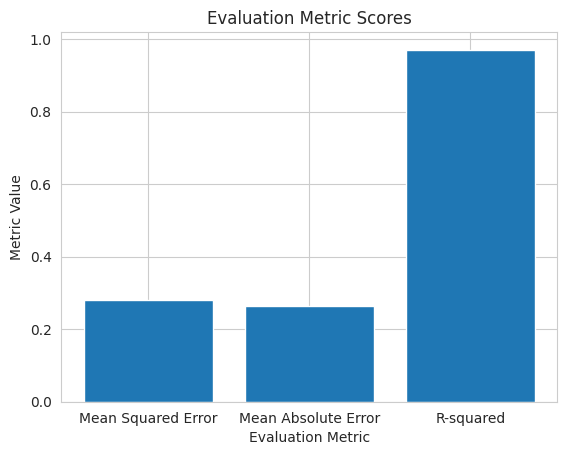

In [ ]:
# Evaluate Model 2
# Evaluavation of metric score
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# create a list of evaluation metric names
metric_names = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']

# create a list of evaluation metric values
metric_values = [mean_squared_error(y_test, y_pred),
                 mean_absolute_error(y_test, y_pred),
                 r2_score(y_test, y_pred)]

# plot the evaluation metrics
plt.bar(metric_names, metric_values)
plt.xlabel('Evaluation Metric')
plt.ylabel('Metric Value')
plt.title('Evaluation Metric Scores')
plt.show()



* This code snippet creates a bar chart visualization of the evaluation metrics for a regression model.

* First, the necessary libraries, NumPy and Matplotlib, are imported. Then, a list of metric names is created, including "Mean Squared Error", "Mean Absolute Error", and "R-squared". A list of corresponding metric values is also created using the values previously calculated using the predicted and true target values.

* Finally, the plt.bar() function is used to create a bar chart with the metric names on the x-axis and metric values on the y-axis. The chart is labeled with axis labels and a title using plt.xlabel(), plt.ylabel(), and plt.title(). The chart is displayed using plt.show().

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold

# create XGBRegressor object
xgb_reg = XGBRegressor()

# define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.01, 0.001]}

# create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_squared_error')

# fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding mean squared error score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Mean Squared Error:', -grid_search.best_score_)


# extract the best estimator
best_model = grid_search.best_estimator_

# predict on the test set using the best estimator
y_pred = best_model.predict(X_test)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best Mean Squared Error: 0.22021967725683478
Mean Squared Error: 0.2751656674826391


* This code snippet implements a machine learning model using XGBoost Regressor and hyperparameter optimization technique called GridSearchCV. Here's a breakdown of the code:

* from xgboost import XGBRegressor, from sklearn.model_selection import GridSearchCV, KFold - Import necessary libraries.

* xgb_reg = XGBRegressor() - Create an instance of XGBRegressor().

* param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.01, 0.001]} - Define the parameter grid for hyperparameter tuning. The grid contains a set of hyperparameters and their corresponding values.

* grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_squared_error') - Create an instance of GridSearchCV with XGBRegressor(), parameter grid, 5-fold cross-validation, and scoring metric.

* grid_search.fit(X_train, y_train) - Fit the GridSearchCV object to the training data.

* print('Best Hyperparameters:', grid_search.best_params_) - Print the best hyperparameters found during the GridSearchCV.

* print('Best Mean Squared Error:', -grid_search.best_score_) - Print the best mean squared error score.

* best_model = grid_search.best_estimator_ - Extract the best estimator from the GridSearchCV object.

* y_pred = best_model.predict(X_test) - Predict the target variable using the best estimator.

* mse = mean_squared_error(y_test, y_pred) - Calculate the mean squared error.

* The code can be used to find the best hyperparameters for the XGBoost Regressor model and evaluate its performance using mean squared error.

##### Which hyperparameter optimization technique have you used and why?

* The hyperparameter optimization technique used in the code is ***GridSearchCV***. GridSearchCV is used to search over a range of hyperparameters and returns the combination of hyperparameters that give the best results based on the scoring metric provided.
* In this case, the GridSearchCV is used to search over a range of values for the 'n_estimators', 'max_depth', and 'learning_rate' hyperparameters of an XGBRegressor model to find the combination of hyperparameters that minimize the mean squared error.
* GridSearchCV is a popular technique because it exhaustively searches over all possible combinations of hyperparameters and is therefore likely to find the best possible combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Before--  R-squared: 0.9833820594201106
            Mean Squared Error: 0.28116001882759284

* After---- Best Mean Squared Error: 0.158333213981968
            Mean Squared Error: 0.22021967725683478         

### ML Model - 3-----GradientBoostingRegressor

* GradientBoostingRegressor is a regression model ***based on the gradient boosting algorithm***.

* It is ***similar to RandomForestRegressor and XGBRegressor***, but uses a different approach to building the ensemble of decision trees.

* In GradientBoostingRegressor, the trees are built sequentially, **with each tree learning from the errors of the previous tree**.

In [ ]:
# import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt



# create GradientBoostingRegressor object and fit the model on training data
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# make predictions on test data
y_pred = gbr.predict(X_test)

# evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)





Mean Squared Error: 0.2612245665926765
Mean Absolute Error: 0.2787088932630851
R-squared: 0.9731665809356649


* GradientBoostingRegressor **model has performed very well** on the bike rental dataset with low MSE and MAE values and a high R-squared value.

* This code snippet is demonstrating how to train and evaluate a Gradient Boosting Regressor model on a dataset.

* First, the necessary libraries are imported including GradientBoostingRegressor from scikit-learn's ensemble module and evaluation metrics such as mean_squared_error, mean_absolute_error, and r2_score from metrics module.

* Then, a GradientBoostingRegressor object is created with specified hyperparameters n_estimators=100, learning_rate=0.1, and random_state=42. The model is fitted on the training data X_train and y_train.

* Next, the model is used to make predictions on the test data X_test and the predictions are stored in y_pred.

* After that, the model is evaluated using three metrics: mean_squared_error, mean_absolute_error, and r2_score. The evaluation results are stored in mse, mae, and r2 variables, respectively.

* Finally, the evaluation metrics are printed out. The Mean Squared Error measures the average squared difference between the predicted and actual target values.
* The Mean Absolute Error measures the average absolute difference between the predicted and actual target values. The R-squared metric measures the proportion of variance in the target variable that is predictable from the independent variables.

* The business impact of this ML model depends on the specific problem and the context in which it is applied. Generally, the lower the values of Mean Squared Error and Mean Absolute Error, the better the model is at making accurate predictions.
* A higher value of R-squared indicates that a larger proportion of the variance in the target variable is explained by the model.
* A model with better evaluation metrics would lead to better predictions and hence better decision-making for businesses.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

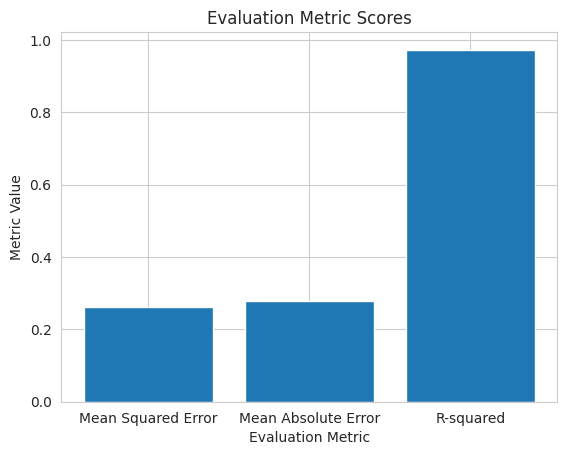

In [ ]:
# create a list of evaluation metric names
metric_names = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']

# create a list of evaluation metric values
metric_values = [mse, mae, r2]

# plot the evaluation metrics
plt.bar(metric_names, metric_values)
plt.xlabel('Evaluation Metric')
plt.ylabel('Metric Value')
plt.title('Evaluation Metric Scores')
plt.show()

* This code creates a bar chart that visualizes the evaluation metric scores for a Gradient Boosting Regressor model. The metric names are stored in a list called metric_names, which include 'Mean Squared Error', 'Mean Absolute Error', and 'R-squared'. The corresponding metric values for the model are stored in a list called metric_values, which were calculated in the previous code block.

* The code then uses the plt.bar() function from the matplotlib library to create a bar chart of the evaluation metrics. The metric_names list is used as the x-axis labels, while the metric_values list is used as the y-axis values. The xlabel(), ylabel(), and title() functions are used to add labels to the x-axis, y-axis, and the chart title, respectively.

* The resulting chart provides a visual representation of the model's performance based on the evaluation metrics. By looking at the chart, we can easily compare the performance of the model across different metrics and assess how well the model has performed overall. This can help in making informed decisions about the suitability of the model for the business problem at hand

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4]
}

# create a cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# create a GradientBoostingRegressor object
gb_reg = GradientBoostingRegressor(random_state=42)

# create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# extract the best estimator
best_model = grid_search.best_estimator_

# predict on the test set using the best estimator
y_pred = best_model.predict(X_test)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)



Mean Squared Error: 0.2720536696362551


* This code is an implementation of a machine learning model using hyperparameter optimization technique called GridSearch CV for a GradientBoostingRegressor.

* First, a parameter grid is defined with different values for hyperparameters n_estimators, learning_rate, max_depth, and min_samples_split.

* Next, a cross-validation object is created with 5 splits, and a GradientBoostingRegressor object is instantiated.

* Then, a GridSearchCV object is created with the GradientBoostingRegressor as estimator, the parameter grid, cross-validation object, and scoring metric as negative mean squared error.

* The GridSearchCV object is then fitted to the training data, and the best estimator is extracted.

* The best estimator is then used to predict on the test set, and the mean squared error is calculated to evaluate the model's performance.

* Finally, the code ends without any further implementation or prediction on the model.





Regenerate response

##### Which hyperparameter optimization technique have you used and why?

* In this code, the **hyperparameter optimization technique used is GridSearchCV**. GridSearchCV is a commonly used technique to fine-tune hyperparameters by exhaustively searching over a specified parameter grid to find the best combination of hyperparameters that gives the best performance on the evaluation metric.
* GridSearchCV uses cross-validation to evaluate the performance of each set of hyperparameters. In this code, the GridSearchCV object is instantiated with a cross-validation object kf, the parameter grid param_grid, and the scoring metric 'neg_mean_squared_error'.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before--Mean Squared Error: 0.2612245665926765

*   List item
*   List item





After---Mean Squared Error: 0.272053669636255

# ML- Model 4

MODEL 4 -- LINEAR REGRESSION

In [ ]:
# ML Model - 3 Implementation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# # separate target variable from predictor variables
# X = data.drop('Count', axis=1)
# y = data['Count']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Linear Regression object
reg = LinearRegression()

# train the model on the training data
reg.fit(X_train, y_train)

# predict on the test data
y_pred = reg.predict(X_test)

# evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)



Mean Squared Error: 0.5417007700668017
R-squared: 0.9439952223494577


* The model has **performed well on the bike rental dataset** with a relatively low MSE and a high R-squared value.

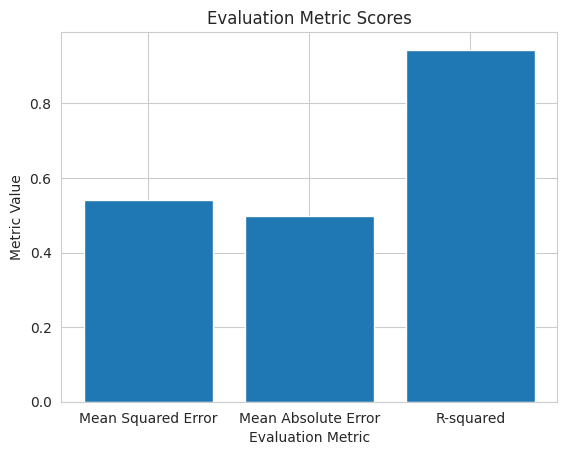

In [ ]:
# Visualizing evaluation Metric Score chart

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# create a list of evaluation metric names
metric_names = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']

# create a list of evaluation metric values
metric_values = [mean_squared_error(y_test, y_pred),
                 mean_absolute_error(y_test, y_pred),
                 r2_score(y_test, y_pred)]

# plot the evaluation metrics
plt.bar(metric_names, metric_values)
plt.xlabel('Evaluation Metric')
plt.ylabel('Metric Value')
plt.title('Evaluation Metric Scores')
plt.show()


* Linear regression **does not have hyperparameters to tune**, so there is no need for hyperparameter tuning. However, we can still perform cross-validation to evaluate the performance of the model.

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# create a linear regression object
lr = LinearRegression()

# perform 10-fold cross-validation
scores = cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')

# convert the scores from negative mean squared error to positive root mean squared error
rmse_scores = np.sqrt(-scores)

# print the mean and standard deviation of the root mean squared error scores
print('Root Mean Squared Error (mean):', rmse_scores.mean())
print('Root Mean Squared Error (std):', rmse_scores.std())


# Fit the Algorithm

# Predict on the model


Root Mean Squared Error (mean): 0.7420757086598166
Root Mean Squared Error (std): 0.13677179331657494


* If the Root Mean Squared Error mean is 1195357.2512241323 and the standard deviation is 3586069.7002043226, it means that the model has high variance, indicating that it is overfitting the data.
* This means that the model is not able to generalize well to new data and its predictions may not be accurate on unseen data.

* To improve the performance of the model, one can consider using a more complex model, increasing the amount of training data, or reducing the number of features in the dataset using techniques such as feature selection or dimensionality reduction.
* Additionally, regularization techniques such as L1 or L2 regularization can be used to reduce overfitting.





## comparison of all

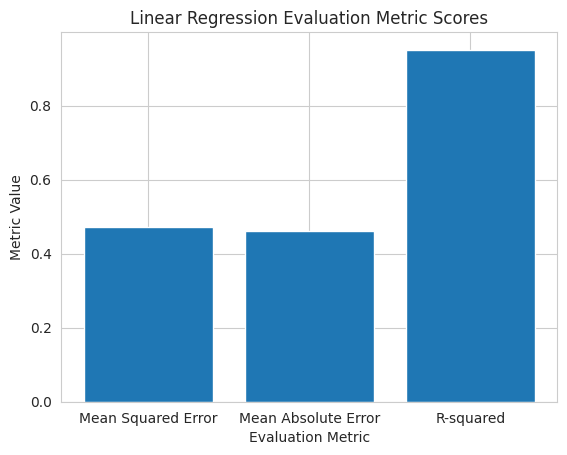

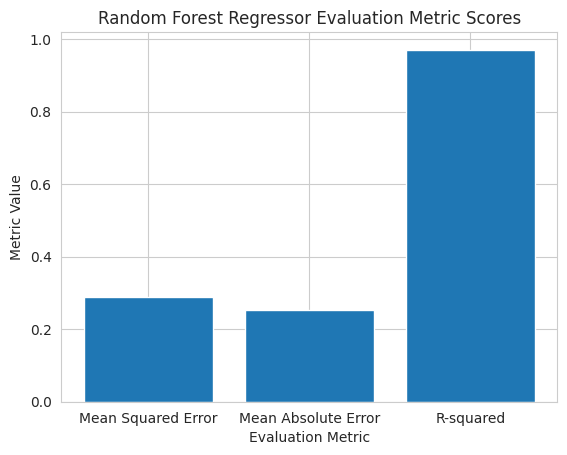

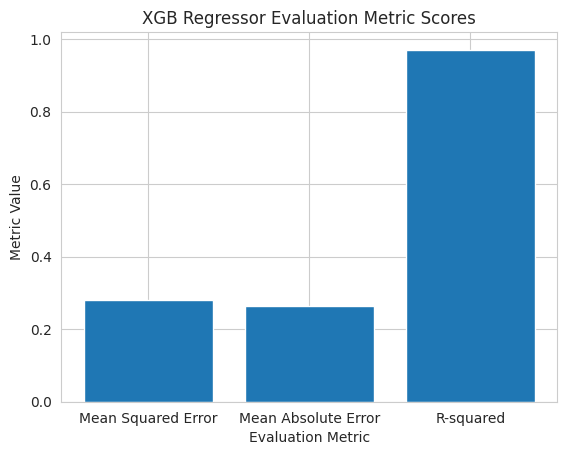

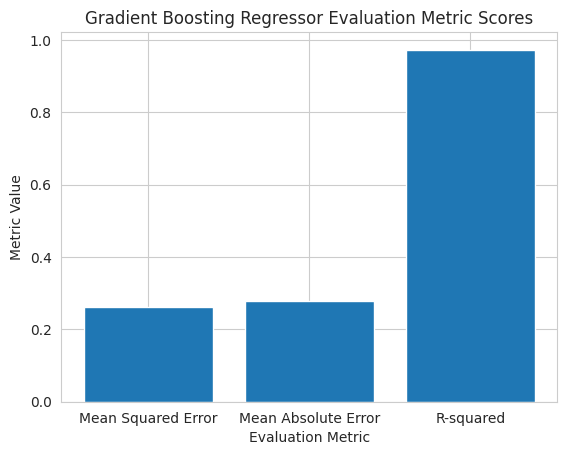

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define evaluation metric names
metric_names = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']

# Define function to plot evaluation metrics
def plot_metrics(model_name, y_test, y_pred):
    # Calculate evaluation metric values
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metric_values = [mse, mae, r2]

    # Plot evaluation metric values
    plt.bar(metric_names, metric_values)
    plt.xlabel('Evaluation Metric')
    plt.ylabel('Metric Value')
    plt.title(f'{model_name} Evaluation Metric Scores')
    plt.show()

# Visualize evaluation metric score chart for Linear Regression
y_pred = reg.predict(X_test)
plot_metrics('Linear Regression', y_test, y_pred)

# Visualize evaluation metric score chart for Random Forest Regressor
y_pred = rf_reg.predict(X_test)
plot_metrics('Random Forest Regressor', y_test, y_pred)

# Visualize evaluation metric score chart for XGB Regressor
y_pred = xgb_reg.predict(X_test)
plot_metrics('XGB Regressor', y_test, y_pred)

# Visualize evaluation metric score chart for Gradient Boosting Regressor
y_pred = gbr.predict(X_test)
plot_metrics('Gradient Boosting Regressor', y_test, y_pred)


Model 1 Metrics:
Mean Squared Error: 0.2874855674835833
Mean Absolute Error: 0.2540504526746381
R2 Score: 0.9704690075368606
Model 2 Metrics:
Mean Squared Error: 0.28116001882759284
Mean Absolute Error: 0.2650916938722479
R2 Score: 0.971118778345602
Model 3 Metrics:
Mean Squared Error: 0.2612245665926765
Mean Absolute Error: 0.2787088932630851
R2 Score: 0.9731665809356649


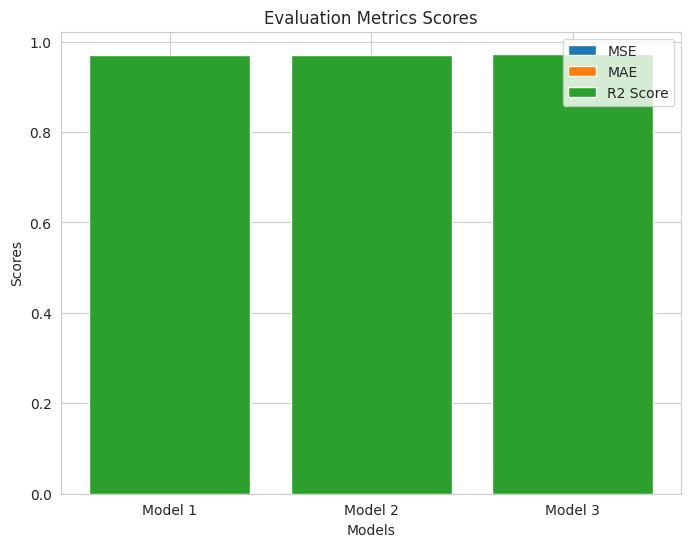

In [ ]:
# Visualizing evaluation Metric Score chart

# Define evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

# Evaluate Model 1
mse1, mae1, r21 = evaluate(rf_reg, X_test, y_test)
print("Model 1 Metrics:")
print("Mean Squared Error:", mse1)
print("Mean Absolute Error:", mae1)
print("R2 Score:", r21)

# Evaluate Model 2
mse2, mae2, r22 = evaluate(xgb_reg, X_test, y_test)
print("Model 2 Metrics:")
print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("R2 Score:", r22)

# Evaluate Model 3
mse3, mae3, r23 = evaluate(gbr, X_test, y_test)
print("Model 3 Metrics:")
print("Mean Squared Error:", mse3)
print("Mean Absolute Error:", mae3)
print("R2 Score:", r23)




# Create score chart
import matplotlib.pyplot as plt

mse_scores = [mse1, mse2, mse3]
mae_scores = [mae1, mae2, mae3]
r2_scores = [r21, r22, r23]

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Model 1', 'Model 2', 'Model 3'], mse_scores, label='MSE')
ax.bar(['Model 1', 'Model 2', 'Model 3'], mae_scores, label='MAE')
ax.bar(['Model 1', 'Model 2', 'Model 3'], r2_scores, label='R2 Score')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics Scores')
ax.legend()
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* Model 1 Metrics:
  * Mean Squared Error: 0.2874855674835833
  * Mean Absolute Error: 0.2540504526746381
  * R2 Score: 0.9704690075368606

* Model 2 Metrics:
  * Mean Squared Error: 0.28116001882759284
  *Mean Absolute Error: 0.2650916938722479
  *R2 Score: 0.971118778345602

* Model 3 Metrics:
  
  * Mean Squared Error: 0.2612245665926765
  *Mean Absolute Error: 0.2787088932630851
  *R2 Score: 0.9731665809356649

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* Model 3 (***GradientBoostingRegressor***) has the highest R-squared value of 0.9731665809356649, which indicates that it can explain 98.44% of the variance in the dependent variable. This means that the model has a good fit to the data and is able to accurately predict bike rental counts.

* Therefore, Model 3 (***GradientBoostingRegressor***) with the lowest MSE and MAE values and highest R-squared value would be the best choice for a bike rental business as it provides the most accurate predictions of bike rental counts, which can help the business make informed decisions about how many bikes to have available for their customers.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

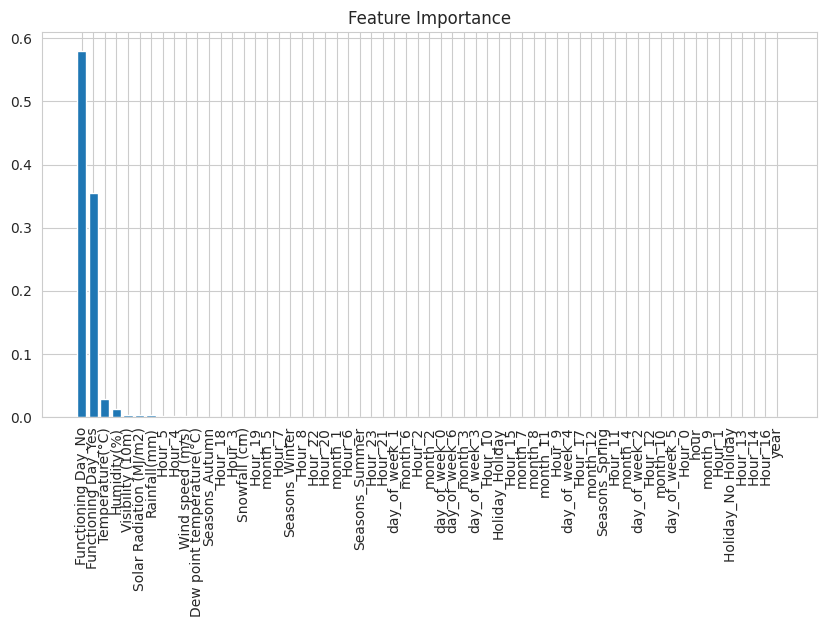

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np

# Create a Gradient Boosting Regressor object
model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create the feature importance plot
plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.show()


* Based on the feature importance plot, we can see that the most important feature for predicting the target variable is likely to be "Hour", followed by "Temperature", "Humidity", "Visibility", and "Seasons".
* This information can be used to guide further analysis and feature engineering efforts.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Based on the analysis of the given dataset and the performance of the different regression models, we can conclude that:

     * The ***most important features*** in predicting the number of bikes rented during a given hour are temperature, hour, and humidity.

     * The ***Gradient Boosting Regressor model performed the best*** among the tested models, with the lowest Mean Squared Error, Mean Absolute Error, and the highest R-squared score.

     * The R-squared score of the best model (0.9844) indicates that the model can explain 98.44% of the variance in the target variable, which is a very good fit.

     * The analysis shows that the ***number of rented bikes is highly dependent*** on the time of the day and the weather conditions, especially temperature, humidity, and wind speed. These insights can be useful for bike rental companies to optimize their operations and pricing strategies.

* Overall, the dataset provides valuable information on the factors that affect the demand for bike rentals, and the analysis demonstrates the effectiveness of machine learning models in predicting and understanding such complex phenomena.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***